## Expedition Clustering Full Dataset Labeling

In order to verify our clustering is working effectively, let's identify and label a set of expeditions.

Let's say 10 (and more if we deem necessary!)

And while we're at it, we can get an idea of the spatiotemporal separations (epsilon, or ϵ) and Levenshtein distances we can expect in expeditions to use in clustering later.

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
from plotting import (
    plot_geographical_heatmap,
    plot_geographical_heatmap_by_day,
    plot_geographical_positions,
    plot_time_histogram,
)

In [3]:
df = pd.read_csv("../data/clean_df.csv", on_bad_lines = "skip", index_col=0)

df.columns = map(str.lower, df.columns)

df = df[df.latitude1.notna()].reset_index()

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_63086/2934715371.py:1: DtypeWarning: Columns (4,6,7,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/clean_df.csv", on_bad_lines = "skip", index_col=0)


In [4]:
# Add a cluster column for cluster_id
df["cluster"] = np.nan

In [5]:
df = df.sort_values(by="startdate")

In [6]:
# Define the regex pattern for the desired date format
date_pattern = r"^\d{4}-\d{2}-\d{2}$"

# Keep rows where 'startdate' matches the date pattern
df = df[df["startdate"].str.match(date_pattern, na=True)]

# Convert 'startdate' to datetime
df["startdate"] = pd.to_datetime(df["startdate"], errors="coerce")

# Define date range
min_date = datetime(1700, 1, 1)
max_date = datetime.today()

# Filter rows within the date range
df = df[(df["startdate"] >= min_date) & (df["startdate"] <= max_date)]


In [7]:
df

index  collectingeventid  startdate enddate  \
111826  420426.0           536221.0 1808-04-20     NaN   
97080   343454.0           441847.0 1808-04-20     NaN   
111825  420425.0           536220.0 1809-04-01     NaN   
114498  431462.0           550870.0 1809-04-01     NaN   
104169  379936.0           487639.0 1809-04-01     NaN   
...          ...                ...        ...     ...   
233724  813123.0           996140.0 2024-09-30     NaN   
233725  813124.0           996141.0 2024-10-09     NaN   
233726  813125.0           996142.0 2024-10-14     NaN   
233728  813127.0           996144.0 2024-10-17     NaN   
233727  813126.0           996143.0 2024-10-17     NaN   

                                                  remarks  localityid  \
111826                                                NaN    536942.0   
97080                                                 NaN    442466.0   
111825                                                NaN    536941.0   
114498                                                NaN    536941.0   
104169                                                NaN    488822.0   
...                                                   ...         ...   
233724  Open, sunny. At top of bank of creek and road ...    931454.0   
233725  Open, sunny, lightly vegetated cobble/gravel b...    931455.0   
233726  Very steep, north- to northwest-facing, open, ...    931456.0   
233728  Flat, ruderal, weedy area and adjacent man-mad...    931458.0   
233727  Flat, ruderal, weedy gravel area at the edge o...    931457.0   

       collectionobjectid                                              text1  \
111826             694989                                                NaN   
97080              598227                                                NaN   
111825             694988                                                NaN   
114498             710227                                                NaN   
104169             645110                                                NaN   
...                   ...                                                ...   
233724            1161331  Twining vine. A single patch, 20 feet x 5 feet...   
233725            1161332  Uncommon. Past peak bloom, plants mostly in fr...   
233726            1161333  Small colony of multi-stemmed shrubs of varyin...   
233728            1161335  Numerous ramets or individuals. Multi-stemmed ...   
233727            1161334  1 individual. 8-foot-tall, perennial, multi-st...   

        minelevation  maxelevation  ...  \
111826           NaN           NaN  ...   
97080            NaN           NaN  ...   
111825           NaN           NaN  ...   
114498           NaN           NaN  ...   
104169           NaN           NaN  ...   
...              ...           ...  ...   
233724          15.0           NaN  ...   
233725         620.0           NaN  ...   
233726         100.0           NaN  ...   
233728         205.0           NaN  ...   
233727         200.0           NaN  ...   

                                             localityname  namedplace  \
111826                              Bhatgong [=Bhatgaon?]         NaN   
97080   habitat in montosis Camrupa [Kamrup?], Bhatgon...         NaN   
111825                            Jolpigory [=Jalpaiguri]         NaN   
114498                            Jolpigory [=Jalpaiguri]         NaN   
104169  habitat in montosis Camrupa [Kamrup?], Jolpigo...         NaN   
...                                                   ...         ...   
233724  unincorporated county, west side of Hartman Rd...         NaN   
233725  unincorporated county, Mashel River, 0.2 miles...         NaN   
233726  Olympia, southeast side of Lakeridge Dr SW, 70...         NaN   
233728  unincorporated county, northwestern edge of a ...         NaN   
233727  unincorporated county, vacant lot, 125 feet so...         NaN   

       geographyid centroidlat centroidlon  commonname  \
111826     33649.0      

In [8]:

df["startdate"] = pd.to_datetime(df["startdate"])
df["latitude1"] = df["latitude1"].astype(float)
df["longitude1"] = df["longitude1"].astype(float)


In [9]:
df[["latitude1", "longitude1", "localityname"]].head(5)

latitude1  longitude1  \
111826  26.495565   88.114457   
97080   26.495565   88.114457   
111825  26.520000   88.730000   
114498  26.520000   88.730000   
104169  26.520000   88.730000   

                                             localityname  
111826                              Bhatgong [=Bhatgaon?]  
97080   habitat in montosis Camrupa [Kamrup?], Bhatgon...  
111825                            Jolpigory [=Jalpaiguri]  
114498                            Jolpigory [=Jalpaiguri]  
104169  habitat in montosis Camrupa [Kamrup?], Jolpigo...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


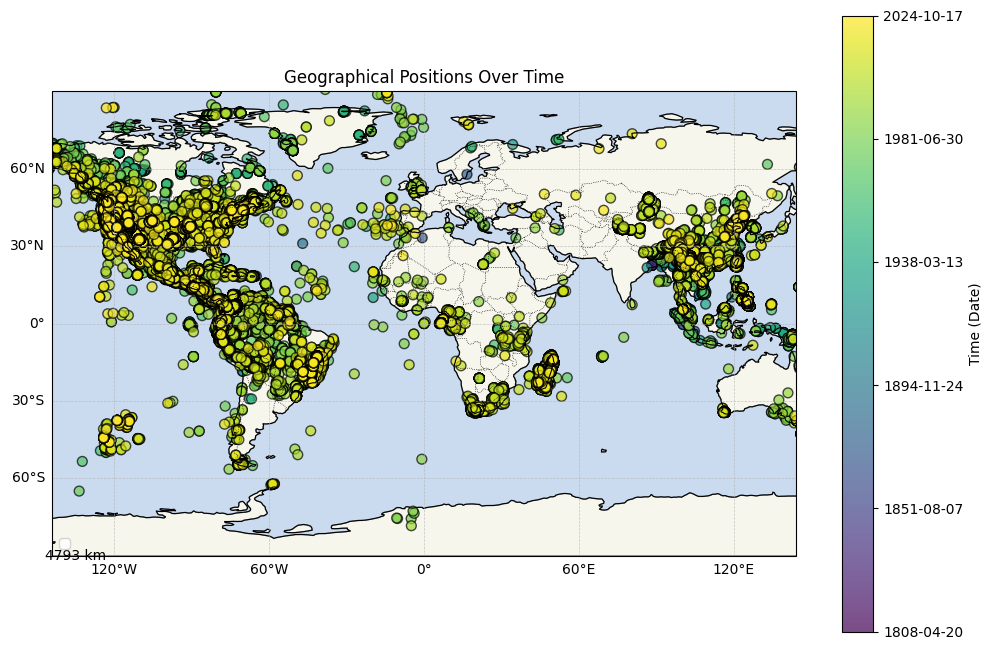

In [10]:
plot_geographical_positions(df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom="auto", plot_towns=False)

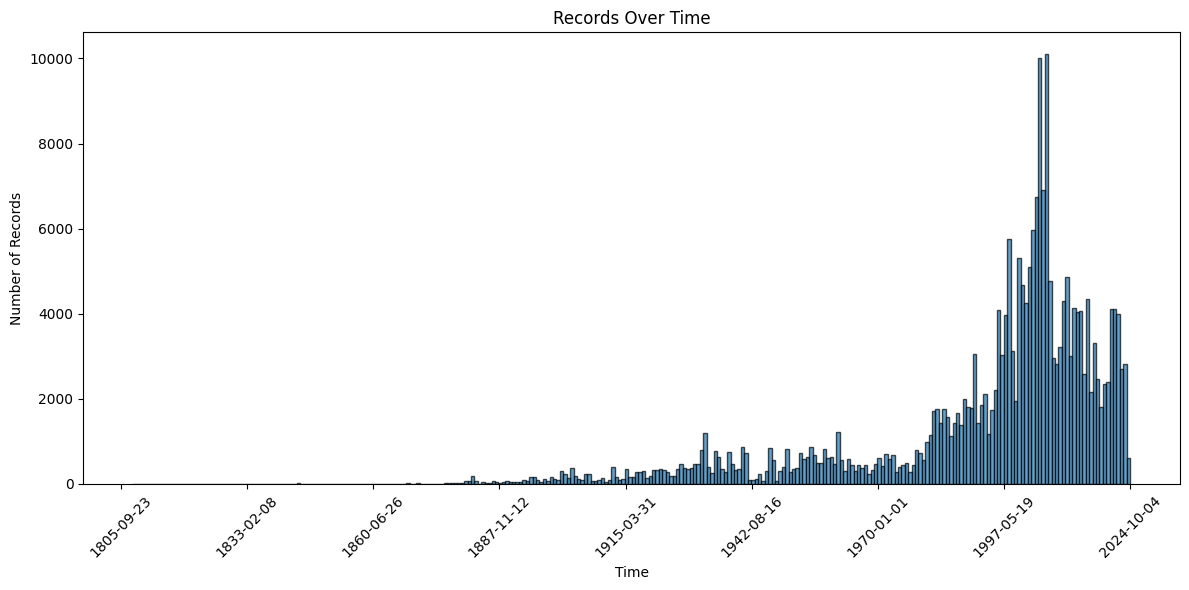

In [11]:
plot_time_histogram(df, datetime_col="startdate")

Lets do some manual expedition cluster labeling!

First, let's look at the distance between records that seem to be in a single cluster... Let's find the max of a couple that seem like they belong _together_

Let's start small, then increase radius

# 1. Cluster Labeling

To locate a cluster, let's start with a fairly wide net.

Lat / lon +- 0.5º (~70 mile radius)

Start Date +- 6 months (1 year radius)

In [12]:
# samp_colleventid_l = list(df.collectionobjectid.sample(10, random_state=123))
# samp_colleventid_l

In [13]:
samp_collobjid_l = [325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

samp_colleventid_l = [162061, 232746, 57595, 74811, 819069, 126488, 78191]

collection object ids: [325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

collecting event ids: [138184, 100868, 109731, 125154, 140665, 118001, 57595, 155686, 61448, 152848]

## a.) Collection Object ID: 162061

In [14]:
samp_record = df[df.collectingeventid == samp_colleventid_l[0]]
samp_record

index  collectingeventid  startdate enddate remarks  localityid  \
43735  102720.0           162061.0 1934-06-11     NaN     NaN    162061.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
43735             382245   NaN        5200.0           NaN  ...   

                    localityname  namedplace  geographyid centroidlat  \
43735  Parker Creek, Warner Mts.         NaN      17158.0       41.57   

      centroidlon  commonname                                 fullname  \
43735      -100.0         NaN  Modoc County, California, United States   

               name spatial_flag cluster  
43735  Modoc County          1.0     NaN  

[1 rows x 23 columns]

In [15]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 41.4505996704     lon: -120.3594970703     start date: 1934-06-11T00:00:00.000000000


In [16]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [17]:
test_df

index  collectingeventid  startdate     enddate remarks  localityid  \
41217   96842.0           152804.0 1934-05-18  1934-05-18     NaN    152804.0   
520      1310.0             2141.0 1934-06-11         NaN     NaN      2141.0   
6536    15325.0            24845.0 1934-06-11  1934-06-11     NaN     24845.0   
27611   64802.0           102486.0 1934-06-11  1934-06-11     NaN    102486.0   
49015  115198.0           181633.0 1934-06-11  1934-06-11     NaN    181633.0   
...         ...                ...        ...         ...     ...         ...   
35052   82258.0           129927.0 1934-08-29  1934-08-29     NaN    129927.0   
35051   82257.0           129926.0 1934-08-29  1934-08-29     NaN    129926.0   
14091   33103.0            52944.0 1934-08-29  1934-08-29     NaN     52944.0   
45600  107130.0           169016.0 1934-08-29  1934-08-29     NaN    169016.0   
2006     4728.0             7639.0 1934-09-05  1934-09-05     NaN      7639.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
41217              78722   NaN           NaN           NaN  ...   
520               334485   NaN        5200.0           NaN  ...   
6536              381540   NaN        5200.0        5200.0  ...   
27611              37836   NaN        5200.0        5200.0  ...   
49015              14446   NaN        5200.0        5200.0  ...   
...                  ...   ...           ...           ...  ...   
35052              62523   NaN        5200.0        5200.0  ...   
35051              55384   NaN        5200.0        5200.0  ...   
14091             118134   NaN        5200.0        5200.0  ...   
45600             286216   NaN        5200.0        5200.0  ...   
2006               78531   NaN           NaN           NaN  ...   

                                 localityname  namedplace  geographyid  \
41217                 Near Timbered Mountain.         NaN      17158.0   
520                             Parker Creek.         NaN      17158.0   
6536                Parker Creek, Warner Mts.         NaN      17158.0   
27611                           Parker Creek.         NaN      17158.0   
49015                            Parker Creek         NaN      17158.0   
...                                       ...         ...          ...   
35052                           Parker Creek.         NaN      17158.0   
35051                           Parker Creek.         NaN      17158.0   
14091                            Parker Creek         NaN      17158.0   
45600                           Parker Creek.         NaN      17158.0   
2006   Summit of Cedar Pass, Warner Mountains         NaN      17158.0   

      centroidlat centroidlon  commonname  \
41217       41.57      -100.0         NaN   
520         41.57      -100.0         NaN   
6536        41.57      -100.0         NaN   
27611       41.57      -100.0         NaN   
49015       41.57      -100.0         NaN   
...           ...         ...         ...   
35052       41.57      -100.0         NaN   
35051       41.57      -100.0         NaN   
14091       41.57      -100.0         NaN   
45600       41.57      -100.0         NaN   
2006        41.57      -100.0         NaN   

                                      fullname          name spatial_flag  \
41217  Modoc County, California, United States  Modoc County          1.0   
520    Modoc County, California, United States  Modoc County          1.0   
6536   Modoc County, California, United States  Modoc County          1.0   
27611  Modoc County, California, United States  Modoc County          1.0   
49015  Modoc County, California, United States  Modoc County          1.0   
...                                        ...           ...          ...   
35052  Modoc County, California, United States  Modoc County          1.0   
35051  Modoc County, California, United States  Modoc County          1.0   
14091  Modoc County, California, United States  Modoc County          1.0   
45600  Modoc County, California,

In [18]:
test_df.startdate.value_counts()

startdate
1934-06-11    85
1934-06-13    69
1934-06-12    60
1934-06-15    27
1934-06-16    13
1934-06-14    11
1934-08-01     8
1934-08-29     6
1934-05-18     1
1934-06-30     1
1934-07-03     1
1934-07-13     1
1934-09-05     1
Name: count, dtype: int64

In [19]:
test_df.localityname.value_counts()

localityname
Parker Creek.                                 50
Parker Creek, Warner Mountains                29
Fandango Pass.                                25
Parker Creek, Warner Mts.                     20
Alturas.                                      14
                                              ..
Patterson Mill Road.                           1
2 1/2 mi. S of Eagleville.                     1
2.5 mi S of Eagleville.                        1
Surprise Valley, 10 mi. S of Fort Bidwell.     1
Summit of Cedar Pass, Warner Mountains         1
Name: count, Length: 65, dtype: int64

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [20]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1934-05-18 00:00:00', '1934-06-11 00:00:00', '1934-06-12 00:00:00',
 '1934-06-13 00:00:00', '1934-06-14 00:00:00', '1934-06-15 00:00:00',
 '1934-06-16 00:00:00', '1934-06-30 00:00:00', '1934-07-03 00:00:00',
 '1934-07-13 00:00:00', '1934-08-01 00:00:00', '1934-08-29 00:00:00',
 '1934-09-05 00:00:00']
Length: 13, dtype: datetime64[ns]

In [21]:
cluster_date_l = [
    ("1934-05-18", "1934-05-18"),
    ("1934-06-11", "1934-06-16"),
    ("1934-07-13", "1934-07-13"),
    ("1934-08-01", "1934-08-01"),
    ("1934-08-29", "1934-08-29"),
    ("1934-09-05", "1934-09-05"),
]

In [22]:
test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[0][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

latitude1  longitude1 remarks             localityname  startdate  \
41217    41.7347   -120.7419     NaN  Near Timbered Mountain. 1934-05-18   

          enddate  
41217  1934-05-18

This is just one record. Lets look for a more interesting cluster

In [23]:
test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[1][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

latitude1  longitude1 remarks                    localityname  \
520      41.4506 -120.359497     NaN                   Parker Creek.   
6536     41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
27611    41.4506 -120.359500     NaN                   Parker Creek.   
49015    41.4506 -120.359500     NaN                    Parker Creek   
38445    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
...          ...         ...     ...                             ...   
40639    41.4506 -120.359500     NaN                   Parker Creek.   
50671    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
50007    41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
13879    41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
39337    41.4506 -120.359500     NaN                   Parker Creek.   

       startdate     enddate  
520   1934-06-11         NaN  
6536  1934-06-11  1934-06-11  
27611 1934-06-11  1934-06-11  
49015 1934-06-11  1934-06-11  
38445 1934-06-11  1934-06-11  
...          ...         ...  
40639 1934-06-16  1934-06-16  
50671 1934-06-16  1934-06-16  
50007 1934-06-16  1934-06-16  
13879 1934-06-16  1934-06-16  
39337 1934-06-16  1934-06-16  

[265 rows x 6 columns]

265 records - lets check it out as our first cluster

### i.) Cluster 0: ('1934-06-11', '1934-06-16')

In [24]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[1][1]))][["latitude1", "longitude1","remarks", "localityname", "startdate", "enddate"]]

group0_df

latitude1  longitude1 remarks                    localityname  \
520      41.4506 -120.359497     NaN                   Parker Creek.   
6536     41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
27611    41.4506 -120.359500     NaN                   Parker Creek.   
49015    41.4506 -120.359500     NaN                    Parker Creek   
38445    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
...          ...         ...     ...                             ...   
40639    41.4506 -120.359500     NaN                   Parker Creek.   
50671    41.4506 -120.359500     NaN       Parker Creek, Warner Mts.   
50007    41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
13879    41.4506 -120.359500     NaN  Parker Creek, Warner Mountains   
39337    41.4506 -120.359500     NaN                   Parker Creek.   

       startdate     enddate  
520   1934-06-11         NaN  
6536  1934-06-11  1934-06-11  
27611 1934-06-11  1934-06-11  
49015 1934-06-11  1934-06-11  
38445 1934-06-11  1934-06-11  
...          ...         ...  
40639 1934-06-16  1934-06-16  
50671 1934-06-16  1934-06-16  
50007 1934-06-16  1934-06-16  
13879 1934-06-16  1934-06-16  
39337 1934-06-16  1934-06-16  

[265 rows x 6 columns]

In [25]:
group0_df.localityname.value_counts()

localityname
Parker Creek.                                                                      43
Parker Creek, Warner Mountains                                                     29
Fandango Pass.                                                                     25
Parker Creek, Warner Mts.                                                          20
Alturas.                                                                           14
Between Davis Creek and Plum Valley.                                               12
Fandango Pass, Warner Mountains                                                    10
Plum Valley.                                                                        9
6 mi. S of Davis Creek.                                                             8
Dorris Reservoir, 2 mi. E of Alturas.                                               8
Plum Valley, Warner Mts.                                                            8
Fandango Pass, Warner Mts.               

In [26]:
group0_df.localityname.unique()

array(['Parker Creek.', 'Parker Creek, Warner Mts.', 'Parker Creek',
       'Parker Creek. Warner Mountains.',
       'Parker Creek, Warner Mountains', 'Parker Creek, Warner Mtns.',
       'N side of Fandango Valley.', '7 mi. N of Davis Creek.',
       'Plum Valley.', 'Between Davis Creek and Plum Valley.',
       '6 miles south of Davis Creek.', '6 mi. S of Davis Creek.',
       'Davis Creek.', 'Plum Valley, Warner Mts.',
       'Plum Valley above Davis Creek, Warner Mts.',
       '9 mi. S of Davis Creek.', '6 miles s. of Davis Creek',
       'Surprise Station.', 'Plum Valley, Warner Mountains',
       'Between Davis Creek and Plum Valley', 'Davis Creek',
       '10 mi. S of New Pine Creek.', 'Lassen Creek.',
       'Patterson Mill Road, Warner Mountains',
       '2.5 mi. S of Eagleville.', 'Fandango Pass.',
       'E side of Bidwell Mt. near foot of grade, about 6 mi. N of Fort Bidwell.',
       'North fork of Barber Creek, Warner Mountains',
       'Fandango Pass, Warner Mountains',

In [27]:
group0_df["localityname"].str.contains("parker creek", case=False, na=False).sum()/len(group0_df)

np.float64(0.3584905660377358)

36% of rows have "Parker Creek" in the localityname.

A bunch of mentions of Warner Mtns, Barber Creek, Davis Creek, Alturas, and more.

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


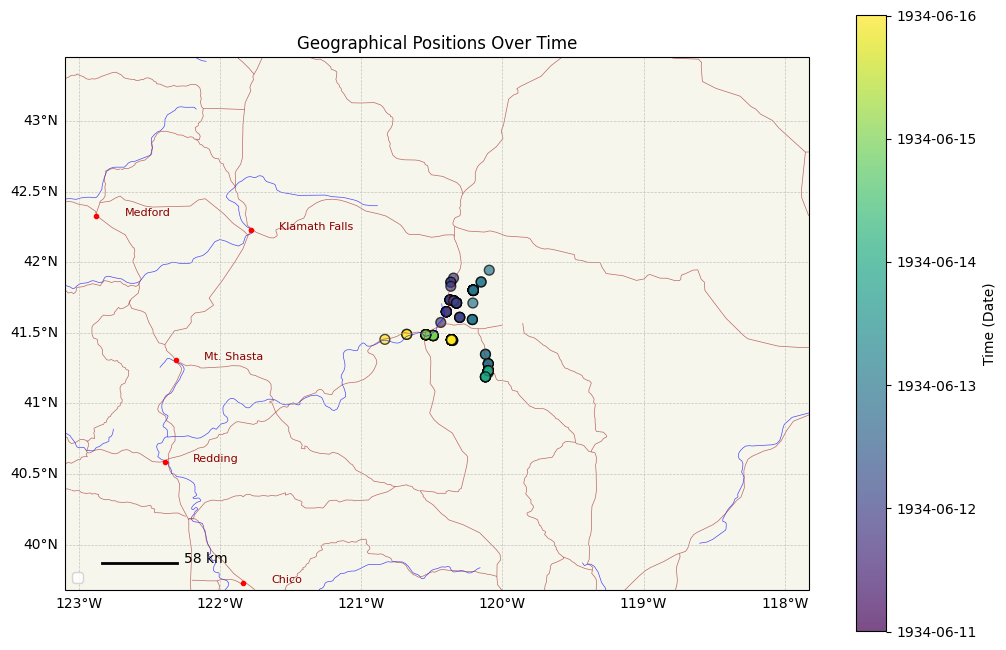

In [28]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


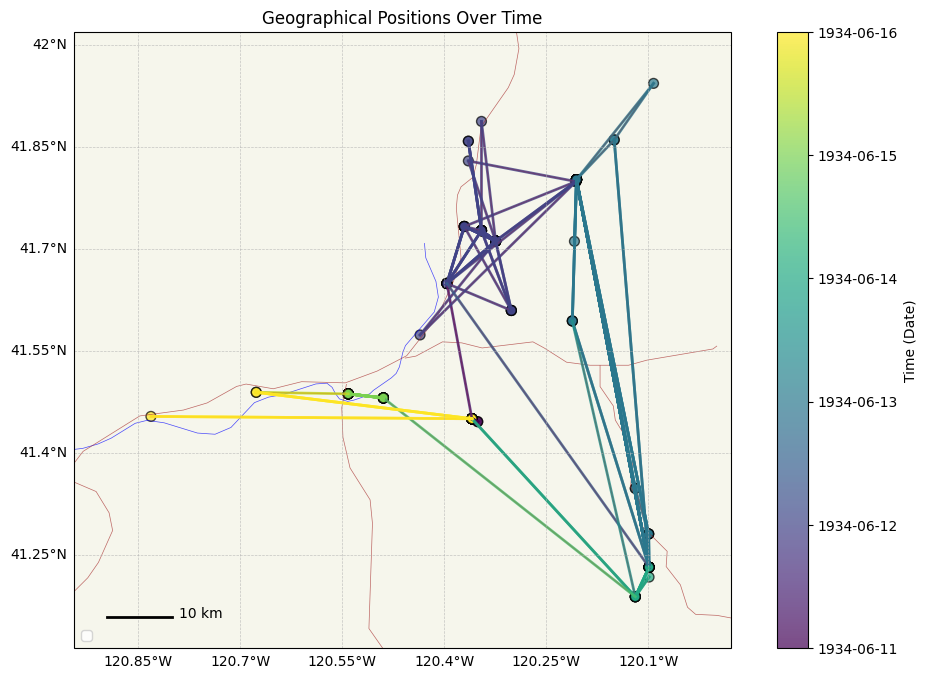

In [29]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",\
                            zoom="auto", cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

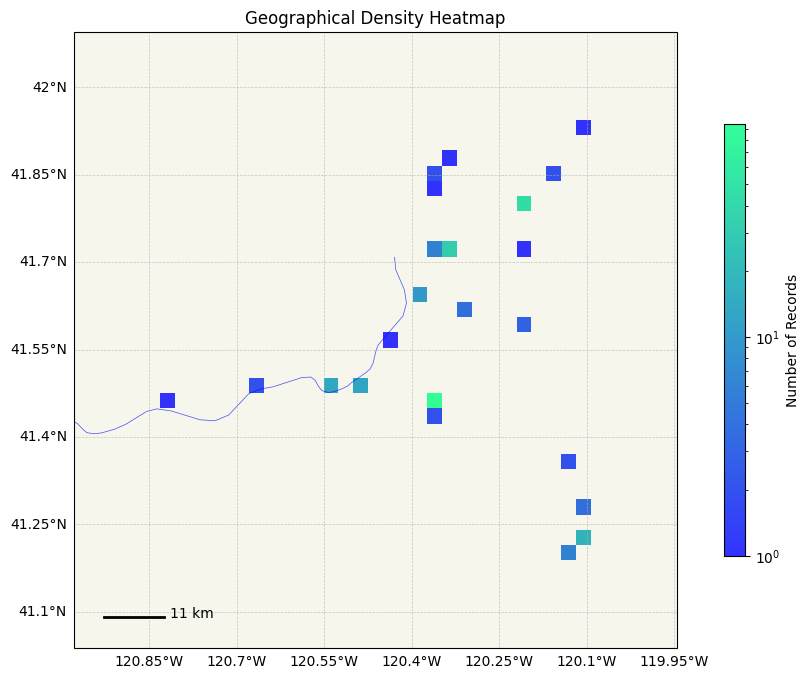

In [30]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=30,
                          zoom=5,  plot_rivers=True, plot_roads=True)


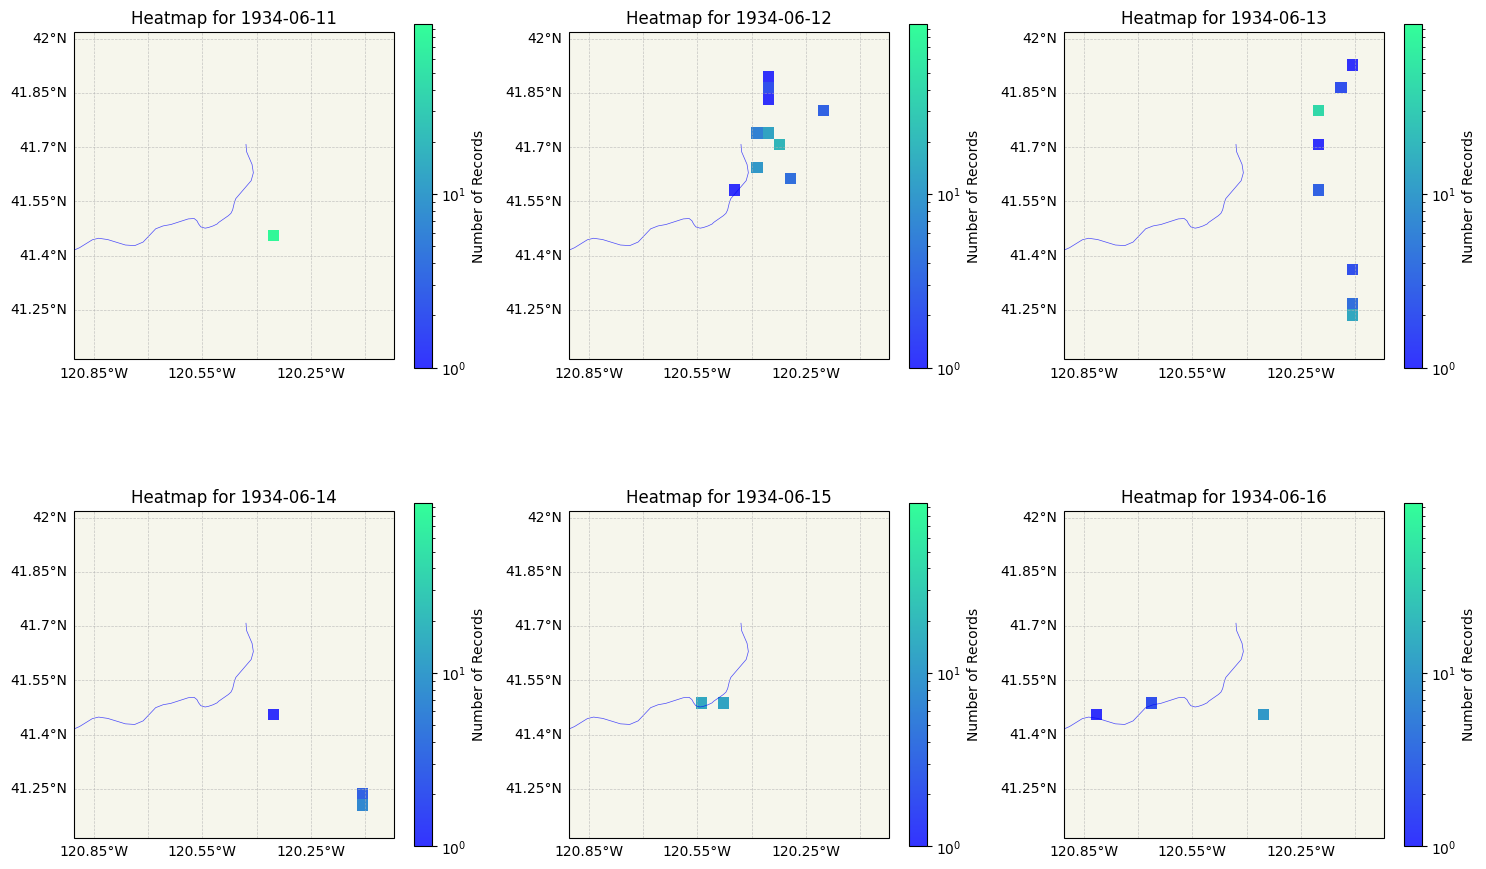

In [31]:
plot_geographical_heatmap_by_day(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",plot_rivers=True, plot_roads=True, grid_size=25)

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [32]:
df.loc[group0_df.index, "cluster"] = "0"
df[df.cluster == "0"].__len__()

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_63086/1027587913.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[group0_df.index, 'cluster'] = '0'


265

Now lets look at another cluster

### ii.) Cluster 1: 1934-08-01 (single day)

Now lets look at the cluster for the random id we initially pulled

In [33]:
cluster_date_l[3]

('1934-08-01', '1934-08-01')

In [34]:
group1_df = test_df[(pd.to_datetime(cluster_date_l[3][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[3][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

group1_df

latitude1  longitude1 remarks                   localityname  \
19480    41.4543   -120.3276     NaN                  Parker Creek.   
15889    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
15890    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
15891    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
37976    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   
19481    41.4543   -120.3276     NaN                  Parker Creek.   
30529    41.3786   -120.2189     NaN        E slope of Warren Peak.   
15888    41.3619   -120.2372     NaN  Pine Creek Basin, Warner Mts.   

       startdate     enddate  
19480 1934-08-01  1934-08-01  
15889 1934-08-01         NaN  
15890 1934-08-01         NaN  
15891 1934-08-01         NaN  
37976 1934-08-01         NaN  
19481 1934-08-01  1934-08-01  
30529 1934-08-01  1934-08-01  
15888 1934-08-01         NaN

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [35]:
group1_df.localityname.value_counts()


localityname
Pine Creek Basin, Warner Mts.    5
Parker Creek.                    2
E slope of Warren Peak.          1
Name: count, dtype: int64

In [36]:
print("group 1 lats: ", group1_df.latitude1.unique())
print("group 1 longs: ", group1_df.longitude1.unique())
print("group 1 date range: ", group1_df.startdate.min(), group1_df.startdate.max())

group 1 lats:  [41.4543 41.3619 41.3786]
group 1 longs:  [-120.3276 -120.2372 -120.2189]
group 1 date range:  1934-08-01 00:00:00 1934-08-01 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


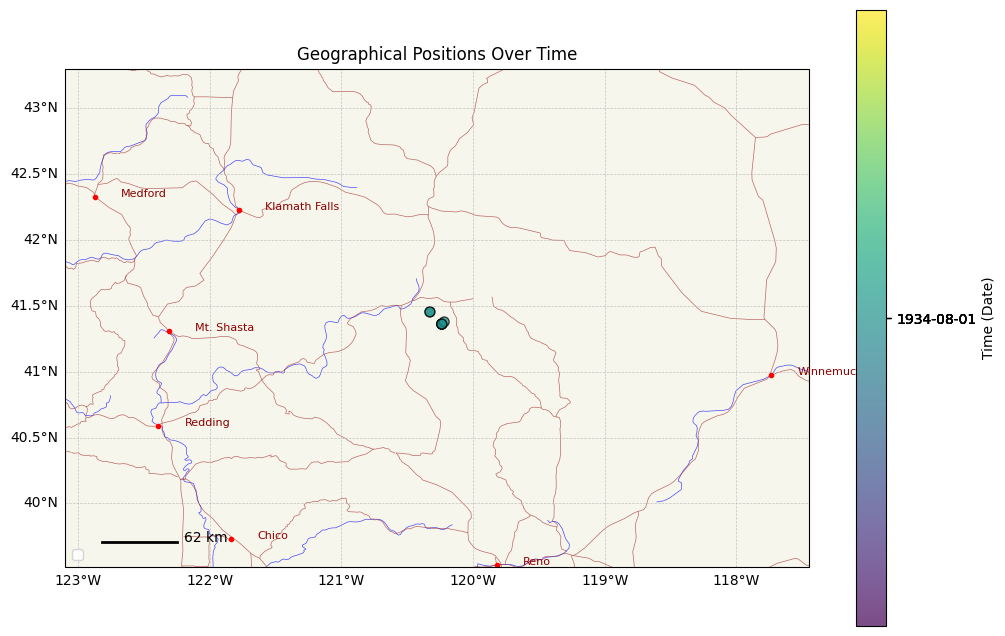

In [37]:
plot_geographical_positions(group1_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


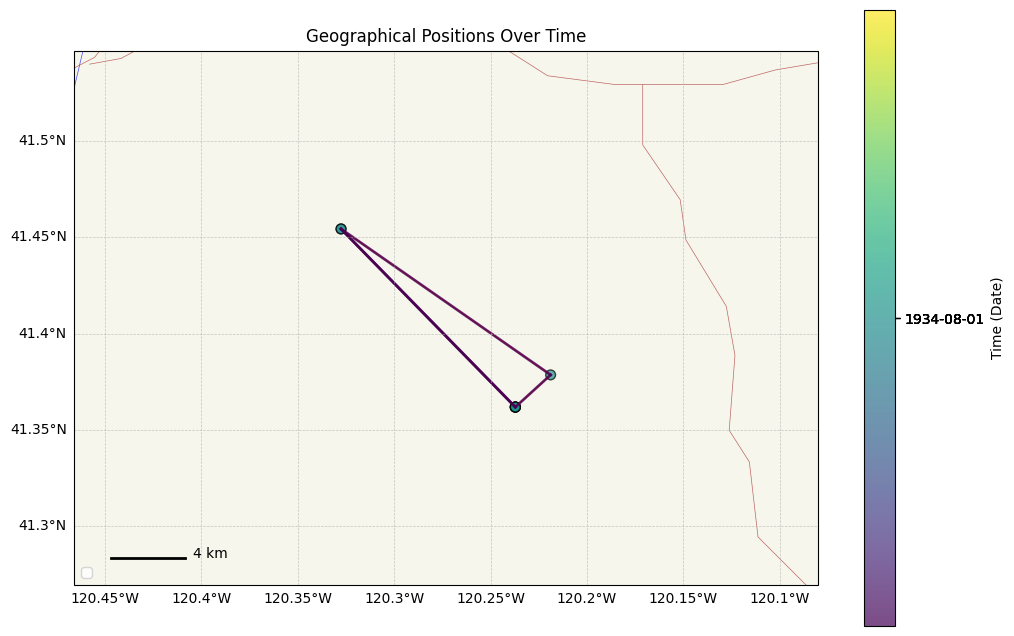

In [38]:
plot_geographical_positions(group1_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

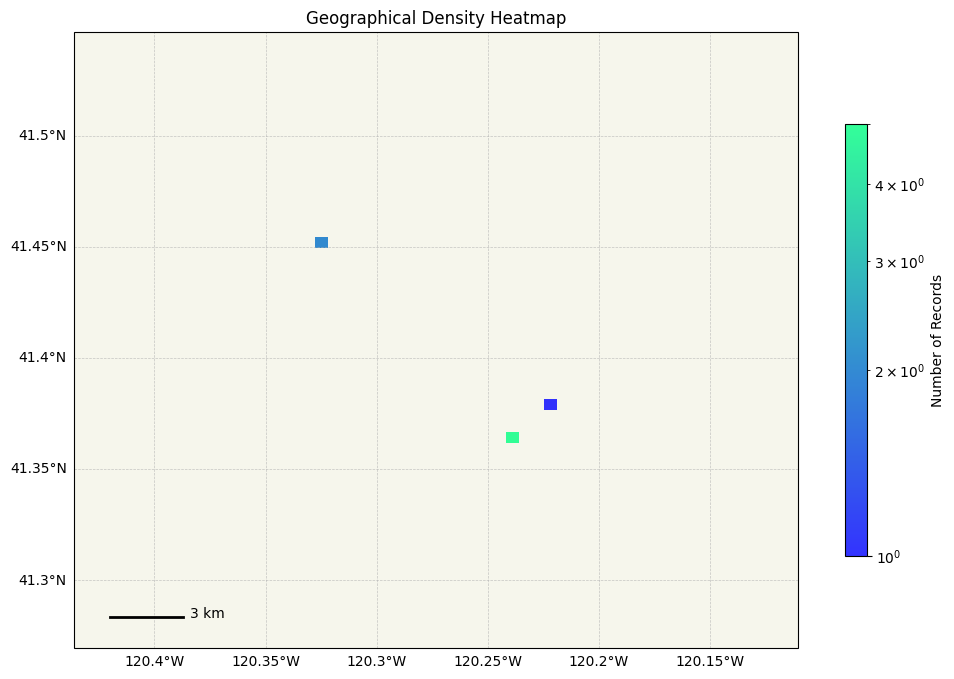

In [39]:
plot_geographical_heatmap(group1_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)

After checking a map - yes they all seem like the same cluster! 

Judging from the 72 rows from the entire data parker creek subset with the group 1 cluster date range with 60 day buffer on each side, we didn't miss any records for this cluster!

Let's label these records with cluster id '1'

In [40]:
df.loc[group1_df.index, "cluster"] = "1"

In [41]:
df[df.cluster == "1"].__len__()

8

In [42]:
df[df.cluster == "1"]

index  collectingeventid  startdate     enddate remarks  localityid  \
15889  37496.0            59783.0 1934-08-01         NaN     NaN     59783.0   
15891  37498.0            59785.0 1934-08-01         NaN     NaN     59785.0   
15890  37497.0            59784.0 1934-08-01         NaN     NaN     59784.0   
19480  45900.0            73033.0 1934-08-01  1934-08-01     NaN     73033.0   
15888  37495.0            59782.0 1934-08-01         NaN     NaN     59782.0   
19481  45901.0            73034.0 1934-08-01  1934-08-01     NaN     73034.0   
37976  89199.0           140824.0 1934-08-01         NaN     NaN    140824.0   
30529  71594.0           113186.0 1934-08-01  1934-08-01     NaN    113186.0   

      collectionobjectid              text1  minelevation  maxelevation  ...  \
15889             162204  Shrub 3-4 m high.        7600.0        7600.0  ...   
15891             332002  Shrub 3-4 m high.        7600.0        7600.0  ...   
15890             287873  Shrub 3-4 m high.        7600.0        7600.0  ...   
19480             104415                NaN        5200.0        5200.0  ...   
15888              24685  Shrub 3-4 m high.        7600.0        7600.0  ...   
19481             258210                NaN        5200.0        5200.0  ...   
37976             284659  Shrub 3-4 m high.        7600.0        7600.0  ...   
30529              45606                NaN           NaN           NaN  ...   

                        localityname  namedplace  geographyid centroidlat  \
15889  Pine Creek Basin, Warner Mts.         NaN      17158.0       41.57   
15891  Pine Creek Basin, Warner Mts.         NaN      17158.0       41.57   
15890  Pine Creek Basin, Warner Mts.         NaN      17158.0       41.57   
19480                  Parker Creek.         NaN      17158.0       41.57   
15888  Pine Creek Basin, Warner Mts.         NaN      17158.0       41.57   
19481                  Parker Creek.         NaN      17158.0       41.57   
37976  Pine Creek Basin, Warner Mts.         NaN      17158.0       41.57   
30529        E slope of Warren Peak.         NaN      17158.0       41.57   

      centroidlon  commonname                                 fullname  \
15889      -100.0         NaN  Modoc County, California, United States   
15891      -100.0         NaN  Modoc County, California, United States   
15890      -100.0         NaN  Modoc County, California, United States   
19480      -100.0         NaN  Modoc County, California, United States   
15888      -100.0         NaN  Modoc County, California, United States   
19481      -100.0         NaN  Modoc County, California, United States   
37976      -100.0         NaN  Modoc County, California, United States   
30529      -100.0         NaN  Modoc County, California, United States   

               name spatial_flag cluster  
15889  Modoc County          1.0       1  
15891  Modoc County          1.0       1  
15890  Modoc County          1.0       1  
19480  Modoc County          1.0       1  
15888  Modoc County          1.0       1  
19481  Modoc County          1.0       1  
37976  Modoc County          1.0       1  
30529  Modoc County          1.0       1  

[8 rows x 23 columns]

### iii.) Cluster 2: 1934-07-13 (single record!)

Now lets look at the cluster for a single record. 

In [43]:
cluster_date_l[2]

('1934-07-13', '1934-07-13')

In [44]:
group2_df = test_df[(pd.to_datetime(cluster_date_l[2][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[2][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

group2_df

latitude1  longitude1 remarks             localityname  startdate  \
36798    41.2323   -120.0991     NaN  N fork of Barber Creek. 1934-07-13   

          enddate  
36798  1934-07-13

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [45]:
group2_df.localityname.value_counts()


localityname
N fork of Barber Creek.    1
Name: count, dtype: int64

In [46]:
print("group 2 lats: ", group2_df.latitude1.unique())
print("group 2 longs: ", group2_df.longitude1.unique())
print("group 2 date range: ", group2_df.startdate.min(), group2_df.startdate.max())

group 2 lats:  [41.2323]
group 2 longs:  [-120.0991]
group 2 date range:  1934-07-13 00:00:00 1934-07-13 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


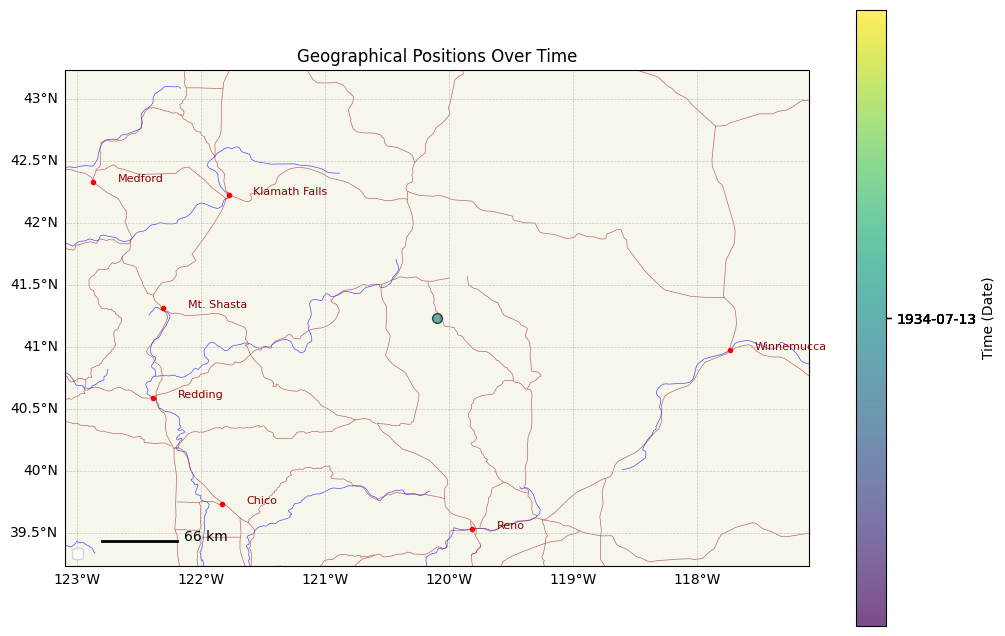

In [47]:
plot_geographical_positions(group2_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


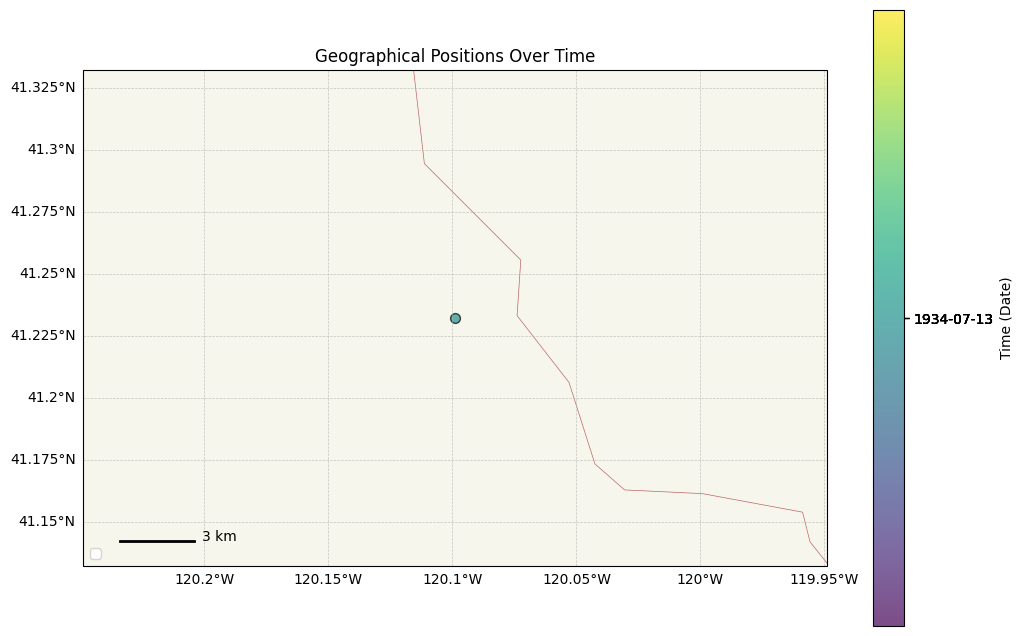

In [48]:
plot_geographical_positions(group2_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [49]:
df.loc[group2_df.index, "cluster"] = "2"

In [50]:
df[df.cluster == "2"]

index  collectingeventid  startdate     enddate remarks  localityid  \
36798  86391.0           136411.0 1934-07-13  1934-07-13     NaN    136411.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
36798             301707   NaN        6000.0        6000.0  ...   

                  localityname  namedplace  geographyid centroidlat  \
36798  N fork of Barber Creek.         NaN      17158.0       41.57   

      centroidlon  commonname                                 fullname  \
36798      -100.0         NaN  Modoc County, California, United States   

               name spatial_flag cluster  
36798  Modoc County          1.0       2  

[1 rows x 23 columns]

## b.) Collection Object ID: 232746

In [51]:
samp_colleventid_l[1]

232746

In [52]:
samp_record = df[df.collectingeventid == samp_colleventid_l[1]]
samp_record

index  collectingeventid  startdate enddate  \
63599  147968.0           232746.0 2004-10-22     NaN   

                                                 remarks  localityid  \
63599  Steep valley slope along river bank with limes...    232746.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
63599             385333   NaN        1700.0           NaN  ...   

                                            localityname  namedplace  \
63599  West bank of Nu Jiang (Salween River) at Stone...         NaN   

       geographyid centroidlat centroidlon  commonname  \
63599      33267.0         NaN         NaN         NaN   

                                                fullname                name  \
63599  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   

      spatial_flag cluster  
63599          1.0     NaN  

[1 rows x 23 columns]

In [53]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 28.0336111111     lon: 98.6008333333     start date: 2004-10-22T00:00:00.000000000


In [54]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [55]:
len(test_df)

2622

In [56]:
test_df.startdate.value_counts()

startdate
2004-10-30    268
2004-10-31    239
2004-10-29    233
2004-10-28    226
2004-10-27    211
2004-11-11    160
2004-11-13    152
2004-11-09    150
2004-11-12    132
2004-11-01    127
2004-11-03    120
2004-11-14    103
2004-11-02    103
2004-11-10     98
2004-10-26     69
2004-11-07     59
2004-11-04     52
2004-11-05     38
2004-10-25     27
2004-10-22     16
2004-11-08     14
2004-10-23     12
2004-10-24      8
2004-11-06      5
Name: count, dtype: int64

In [57]:
test_df.localityname.value_counts()

localityname
About 0.6 km NW of Meiliwang on the trail between Bapo and Xixiaofang on the trail from Bapo to Gongshan via Qiqi on                    122
N of Nengpula on the W side of the Dulong Jiang and to the N of Hongxin Qiao (Red Star bridge) ca. 0.3 km SW of Bapo.                   118
E side of Gaoligong Shan on the road from Gongshan to Kongdang.                                                                          83
E side of Gaoligong Shan on the road from Danzhu to the Myanmar border.                                                                  78
Along the Gamolai He ca. 3 km S of Bapo on the E side of the Dulong Jiang.                                                               77
                                                                                                                                       ... 
West slope of Gaoligong Shan, Irrawaddy catchment, east bank of Dulong Jiang below Mengdi village south of Bapo.                          1
Gongsha

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [58]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2004-10-22 00:00:00', '2004-10-23 00:00:00', '2004-10-24 00:00:00',
 '2004-10-25 00:00:00', '2004-10-26 00:00:00', '2004-10-27 00:00:00',
 '2004-10-28 00:00:00', '2004-10-29 00:00:00', '2004-10-30 00:00:00',
 '2004-10-31 00:00:00', '2004-11-01 00:00:00', '2004-11-02 00:00:00',
 '2004-11-03 00:00:00', '2004-11-04 00:00:00', '2004-11-05 00:00:00',
 '2004-11-06 00:00:00', '2004-11-07 00:00:00', '2004-11-08 00:00:00',
 '2004-11-09 00:00:00', '2004-11-10 00:00:00', '2004-11-11 00:00:00',
 '2004-11-12 00:00:00', '2004-11-13 00:00:00', '2004-11-14 00:00:00']
Length: 24, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


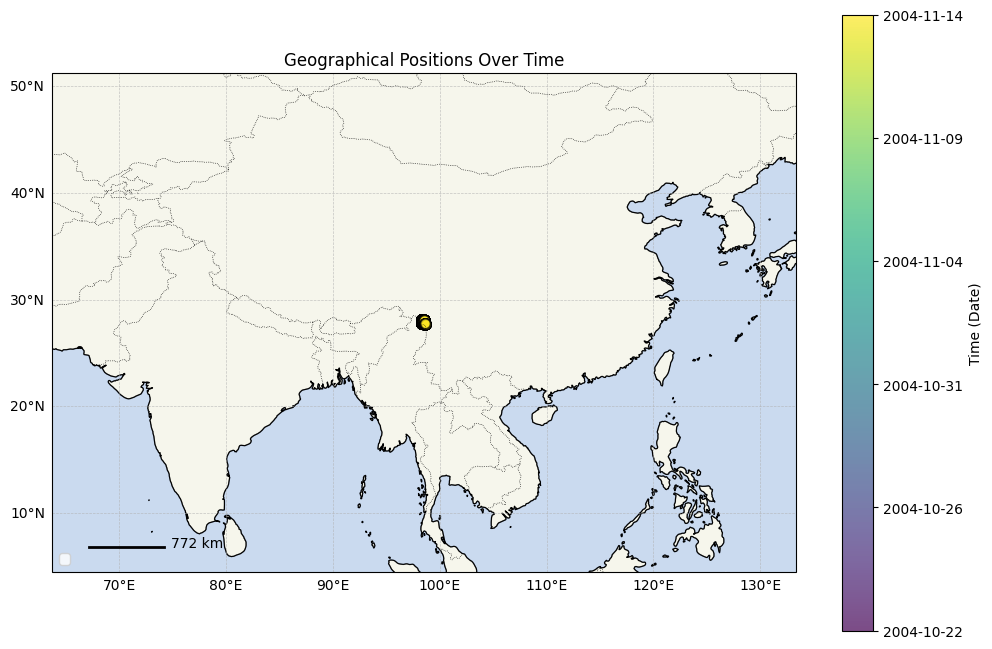

In [59]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.02, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


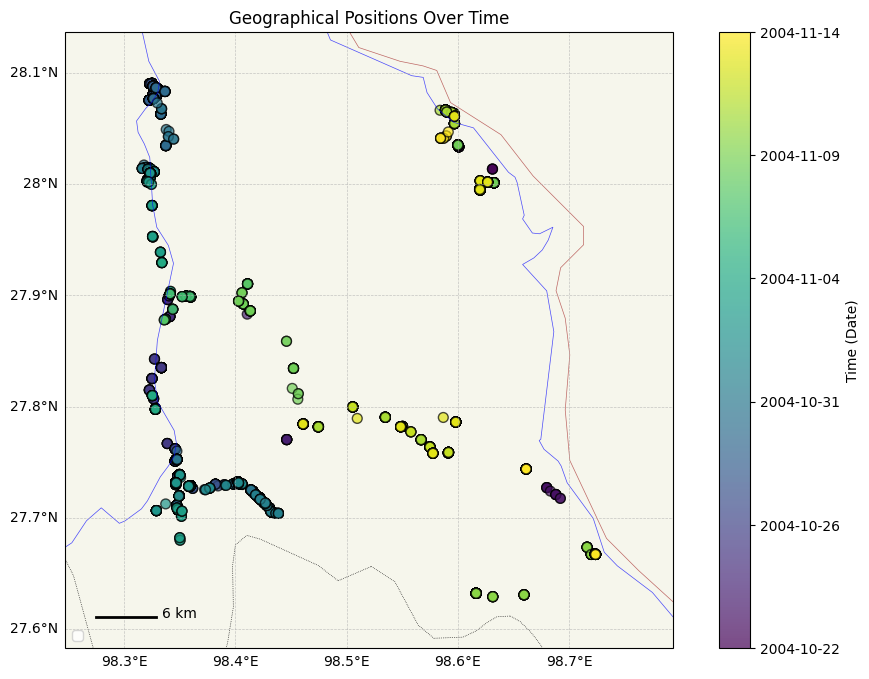

In [60]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom="auto", cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


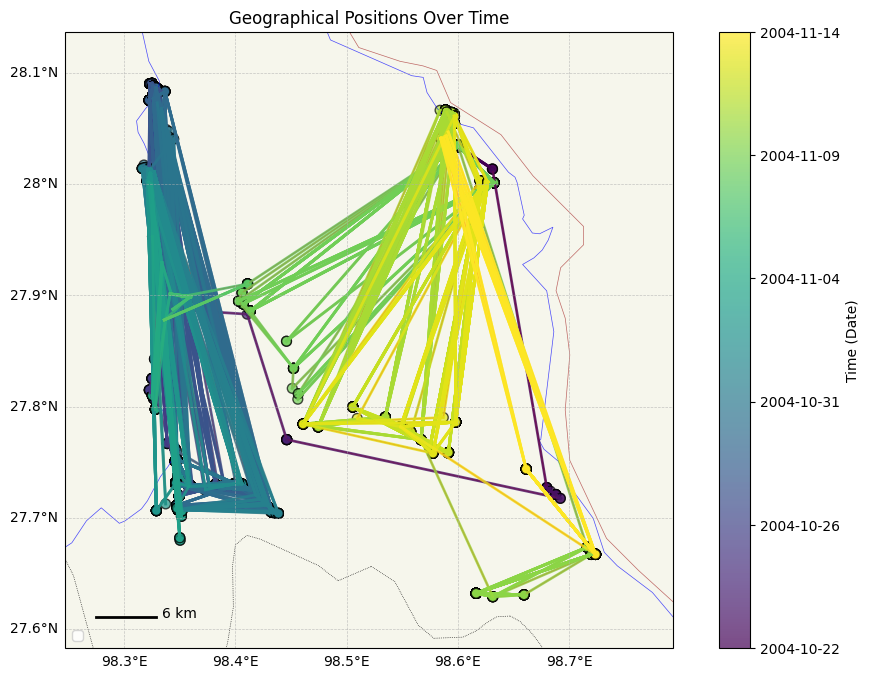

In [61]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom="auto", cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

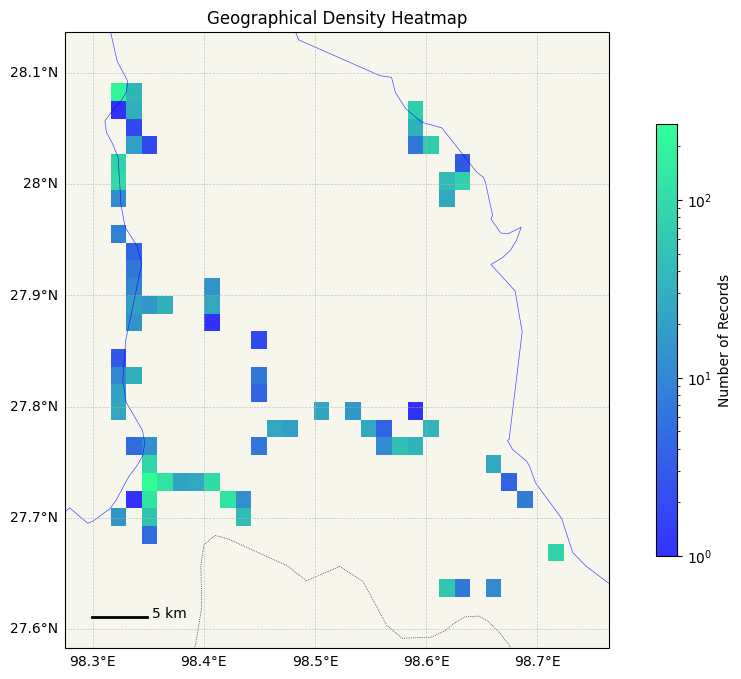

In [62]:
plot_geographical_heatmap(test_df, lat_col="latitude1", lon_col="longitude1", grid_size=30,
                          zoom="auto",  plot_rivers=True, plot_roads=True)


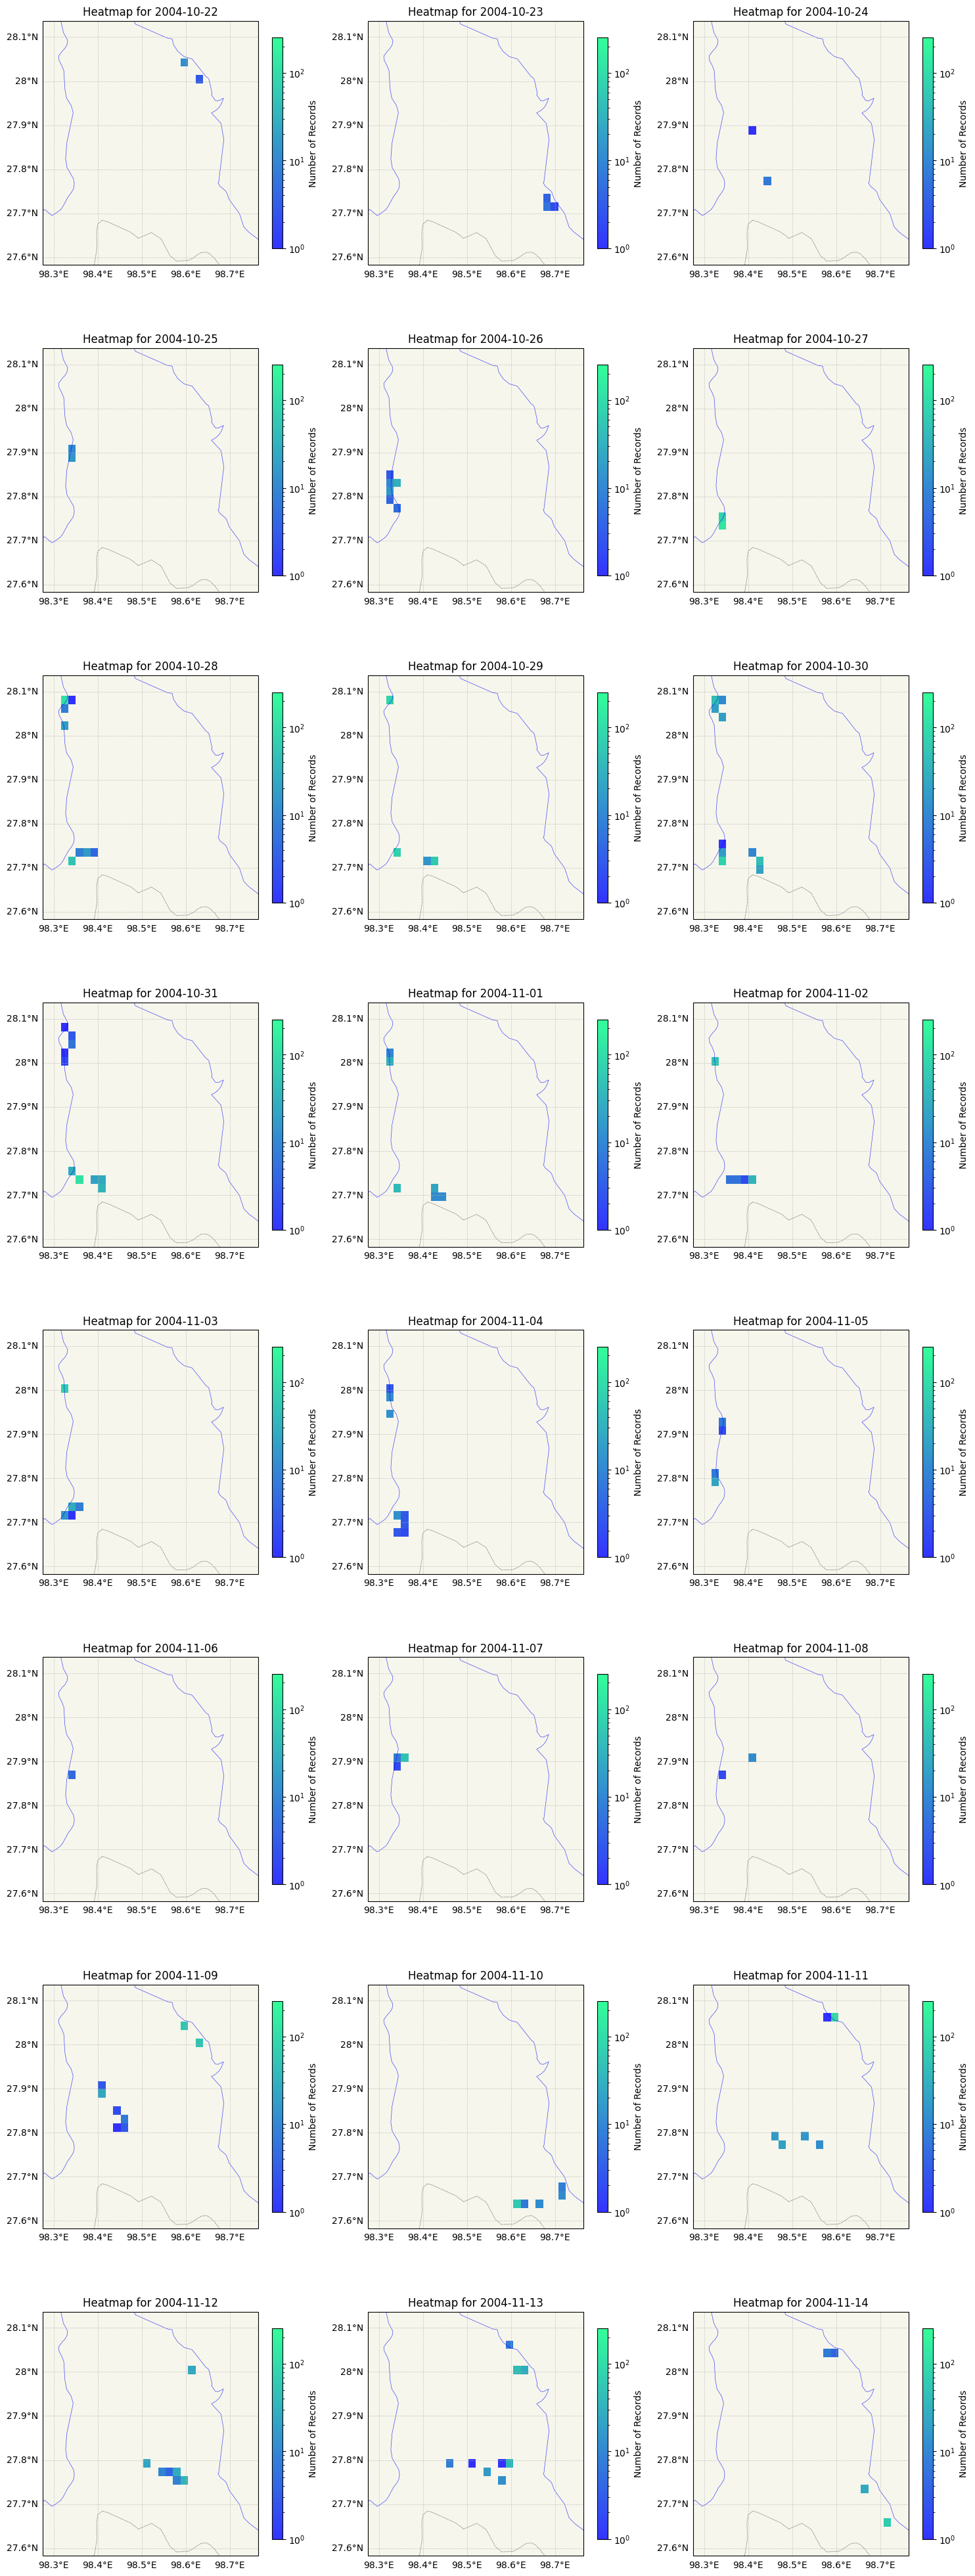

In [63]:
plot_geographical_heatmap_by_day(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",plot_rivers=True, plot_roads=True, grid_size=25)

2622 records - lets check it out as our first cluster

In [64]:
test_df.startdate.min()

Timestamp('2004-10-22 00:00:00')

### i.) Cluster 3: ('1998-10-20', '1998-11-08')

In [65]:
group0_df = test_df

group0_df

index  collectingeventid  startdate     enddate  \
63592  147961.0           232739.0 2004-10-22         NaN   
63587  147956.0           232734.0 2004-10-22         NaN   
63588  147957.0           232735.0 2004-10-22         NaN   
63594  147963.0           232741.0 2004-10-22         NaN   
63589  147958.0           232736.0 2004-10-22         NaN   
...         ...                ...        ...         ...   
15827   37372.0            59576.0 2004-11-14         NaN   
11152   26225.0            42020.0 2004-11-14         NaN   
49811  117089.0           184567.0 2004-11-14         NaN   
25951   60808.0            96246.0 2004-11-14  2004-11-14   
49866  117220.0           184783.0 2004-11-14         NaN   

                                                 remarks  localityid  \
63592  Steep valley slope along river bank with limes...    232739.0   
63587  Steep valley slope along river bank with limes...    232734.0   
63588  Steep valley slope along river bank with limes...    232735.0   
63594  Steep valley slope along river bank with limes...    232741.0   
63589  Steep valley slope along river bank with limes...    232736.0   
...                                                  ...         ...   
15827  Disturbed thicket and secondary forest with pl...     59576.0   
11152            Disturbed thicket and secondary forest.     42020.0   
49811  Disturbed thicket and secondary forest with pl...    184567.0   
25951  Disturbed thicket and secondary forest with pl...     96246.0   
49866  Disturbed thicket and secondary forest with pl...    184783.0   

      collectionobjectid                                        text1  \
63592             385326                                          NaN   
63587             385321                                          NaN   
63588             385322                                          NaN   
63594             385328                                          NaN   
63589             385323                                          NaN   
...                  ...                                          ...   
15827             145156           Shrub ca. 1 m tall. Flowers white.   
11152             260779          Herb ca. 1.3 m tall. Flowers green.   
49811             363309               Shrub 2-3 m tall. Fruit brown.   
25951             347227  Terrestrial fern 20-30 cm tall. Sori brown.   
49866             367031       Arching shrub 1-2 m tall. Fruit green.   

       minelevation  maxelevation  ...  namedplace  geographyid  centroidlat  \
63592        1700.0           NaN  ...         NaN      33267.0          NaN   
63587        1700.0           NaN  ...         NaN      33267.0          NaN   
63588        1700.0           NaN  ...         NaN      33267.0          NaN   
63594        1700.0           NaN  ...         NaN      33267.0          NaN   
63589        1700.0           NaN  ...         NaN      33267.0          NaN   
...             ...           ...  ...         ...          ...          ...   
15827        1640.0           NaN  ...         NaN      33269.0          NaN   
11152        1430.0           NaN  ...         NaN      33269.0          NaN   
49811        1640.0           NaN  ...         NaN      33269.0          NaN   
25951        1640.0        1640.0  ...         NaN      33269.0          NaN   
49866        1640.0           NaN  ...         NaN      33269.0          NaN   

      centroidlon commonname  \
63592         NaN        NaN   
63587         NaN        NaN   
63588         NaN        NaN   
63594         NaN        NaN   
63589         NaN        NaN   
...           ...        ...   
15827         NaN        NaN   
11152         NaN        NaN   
49811         NaN        NaN   
25951         NaN        NaN   
49866         NaN        NaN   

                                                fullname                name  \
63592  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   
63587  Bingzhongluo Xiang, Go

In [66]:
group0_df.localityname.value_counts()

localityname
About 0.6 km NW of Meiliwang on the trail between Bapo and Xixiaofang on the trail from Bapo to Gongshan via Qiqi on                    122
N of Nengpula on the W side of the Dulong Jiang and to the N of Hongxin Qiao (Red Star bridge) ca. 0.3 km SW of Bapo.                   118
E side of Gaoligong Shan on the road from Gongshan to Kongdang.                                                                          83
E side of Gaoligong Shan on the road from Danzhu to the Myanmar border.                                                                  78
Along the Gamolai He ca. 3 km S of Bapo on the E side of the Dulong Jiang.                                                               77
                                                                                                                                       ... 
West slope of Gaoligong Shan, Irrawaddy catchment, east bank of Dulong Jiang below Mengdi village south of Bapo.                          1
Gongsha

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [67]:
df.loc[group0_df.index, "cluster"] = "3"
df[df.cluster == "3"].__len__()

2622

## c.) Collection Object ID: 57595

In [68]:
samp_colleventid_l[2]

57595

In [69]:
samp_record = df[df.collectingeventid == 109731]
samp_record

index  collectingeventid  startdate     enddate  \
29557  69352.0           109731.0 2006-08-20  2006-08-20   

                                                 remarks  localityid  \
29557  Secondary substropical evergreen broadleaf for...    109731.0   

      collectionobjectid                                             text1  \
29557             124799  Herb, 30-70 cm tall. Flowers white. Fruit green.   

       minelevation  maxelevation  ...  \
29557        1700.0        1700.0  ...   

                                            localityname  \
29557  Vicinity of Xiaochala, ca. 1 km NW of the mout...   

                                              namedplace  geographyid  \
29557  Vicinity of Xiaochala, ca. 1 km NW of the mout...      33268.0   

      centroidlat centroidlon  commonname  \
29557         NaN         NaN         NaN   

                                                fullname                name  \
29557  Bingzhongluo Xiang, Gongshan Autonomous County...  Bingzhongluo Xiang   

      spatial_flag cluster  
29557          1.0     NaN  

[1 rows x 23 columns]

In [70]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 27.9741666667     lon: 98.655     start date: 2006-08-20T00:00:00.000000000


In [71]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [72]:
test_df

index  collectingeventid  startdate enddate  \
61750  144791.0           228278.0 2006-07-28     NaN   
49009  115182.0           181608.0 2006-07-28     NaN   
18128   42720.0            67969.0 2006-07-28     NaN   
60782  142565.0           224789.0 2006-07-28     NaN   
14039   32961.0            52708.0 2006-07-28     NaN   
...         ...                ...        ...     ...   
65513  149882.0           234661.0 2006-09-05     NaN   
65515  149884.0           234663.0 2006-09-05     NaN   
65516  149885.0           234664.0 2006-09-05     NaN   
65518  149887.0           234666.0 2006-09-05     NaN   
65517  149886.0           234665.0 2006-09-05     NaN   

                                                 remarks  localityid  \
61750  Sclerophyllous evergreen broadleaf forest, dis...    228278.0   
49009  Sclerophyllous evergreen broadleaf forest, dis...    181608.0   
18128  Sclerophyllous evergreen broadleaf forest, dis...     67969.0   
60782  Sclerophyllous evergreen broadleaf forest, dis...    224789.0   
14039  Sclerophyllous evergreen broadleaf forest, dis...     52708.0   
...                                                  ...         ...   
65513  Large valley with mixed evergreen broad-leaved...    234661.0   
65515  Large valley with mixed evergreen broad-leaved...    234663.0   
65516  Large valley with mixed evergreen broad-leaved...    234664.0   
65518  Large valley with mixed evergreen broad-leaved...    234666.0   
65517  Large valley with mixed evergreen broad-leaved...    234665.0   

      collectionobjectid                                              text1  \
61750             102399                     Tree 10 m tall. Flowers white.   
49009             211901           Tree 4-5 m tall. Fruit with brown hairs.   
18128             316073  Woody vine 2-3 m long. Flowers purplish pink. ...   
60782             186700                Tree 5-6 m tall. Young fruit green.   
14039             287589           Tree 5-8 m tall. Young fruit dark green.   
...                  ...                                                ...   
65513             387500                                                NaN   
65515             387502                                                NaN   
65516             387503                                                NaN   
65518             387505                                                NaN   
65517             387504                                                NaN   

       minelevation  maxelevation  ...  \
61750        1490.0           NaN  ...   
49009        1550.0           NaN  ...   
18128        1550.0           NaN  ...   
60782        1550.0           NaN  ...   
14039        1490.0           NaN  ...   
...             ...           ...  ...   
65513        2104.0           NaN  ...   
65515        2104.0           NaN  ...   
65516        2104.0           NaN  ...   
65518        2104.0           NaN  ...   
65517        2104.0           NaN  ...   

                                            localityname  \
61750  Vicinity of Zilijia Cun, near Shimen Guan (Sto...   
49009  Vicinity of Junindang Cun, ca. 26 km by road (...   
18128  Vicinity of Junindang Cun, ca. 26 km by road (...   
60782  Vicinity of Junindang Cun, ca. 26 km by road (...   
14039  Vicinity of Zilijia Cun, near Shimen Guan (Sto...   
...                                                  ...   
65513  West slope of Gaoligong Shan, Irrawaddy catchm...   
65515  West slope of Gaoligong Shan, Irrawaddy catchm...   
65516  West slope of Gaoligong Shan, Irrawaddy catchm...   
65518  West slope of Gaoligong Shan, Irrawaddy catchm...   
65517  West slope of Gaoligong Shan, Irrawaddy catchm...   

                                              namedplace  geographyid  \
61750                                                NaN      33268.0   
49009  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
18128  Vicinity of Junindang Cun, ca. 26 km by road (...      3327

In [73]:
test_df.startdate.value_counts()

startdate
2006-08-18    368
2006-09-01    303
2006-08-29    284
2006-08-12    266
2006-08-17    246
2006-08-20    238
2006-08-21    237
2006-08-19    234
2006-08-13    224
2006-08-28    203
2006-08-30    146
2006-08-24    130
2006-08-23    124
2006-08-14    120
2006-08-31    108
2006-08-16     98
2006-08-11     97
2006-09-02     92
2006-08-25     77
2006-08-26     71
2006-08-22     69
2006-08-27     53
2006-09-03     42
2006-09-05      8
2006-07-28      5
2006-08-15      3
Name: count, dtype: int64

In [74]:
test_df.localityname.value_counts()

localityname
Vicinity of Danghatu near Km 49 on the road from Gongshan to Kongdang and ca. 20.4 direct km WNW of Gongshan on the E                        123
Vicinity of Heiwadi Qiao on the road from Gongshan to Kongdang, ca. 9.5 direct km NW of Gongshan on the E side of                            105
Vicinity of Cikeluo Qiao near Km 41 on the road from Gongshan to Kongdang and ca. 16.8 direct km WNW of Gongshan on the                       99
About 1.2 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang valley, E side of                       93
Near Yipsaka Lake, 2.1 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang                            78
                                                                                                                                            ... 
East slope of Gaoligong Shan, Nu Jiang (Salween) catchment, Nianwaluo He valley NW of Fucai.                         

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [75]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2006-07-28 00:00:00', '2006-08-11 00:00:00', '2006-08-12 00:00:00',
 '2006-08-13 00:00:00', '2006-08-14 00:00:00', '2006-08-15 00:00:00',
 '2006-08-16 00:00:00', '2006-08-17 00:00:00', '2006-08-18 00:00:00',
 '2006-08-19 00:00:00', '2006-08-20 00:00:00', '2006-08-21 00:00:00',
 '2006-08-22 00:00:00', '2006-08-23 00:00:00', '2006-08-24 00:00:00',
 '2006-08-25 00:00:00', '2006-08-26 00:00:00', '2006-08-27 00:00:00',
 '2006-08-28 00:00:00', '2006-08-29 00:00:00', '2006-08-30 00:00:00',
 '2006-08-31 00:00:00', '2006-09-01 00:00:00', '2006-09-02 00:00:00',
 '2006-09-03 00:00:00', '2006-09-05 00:00:00']
Length: 26, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


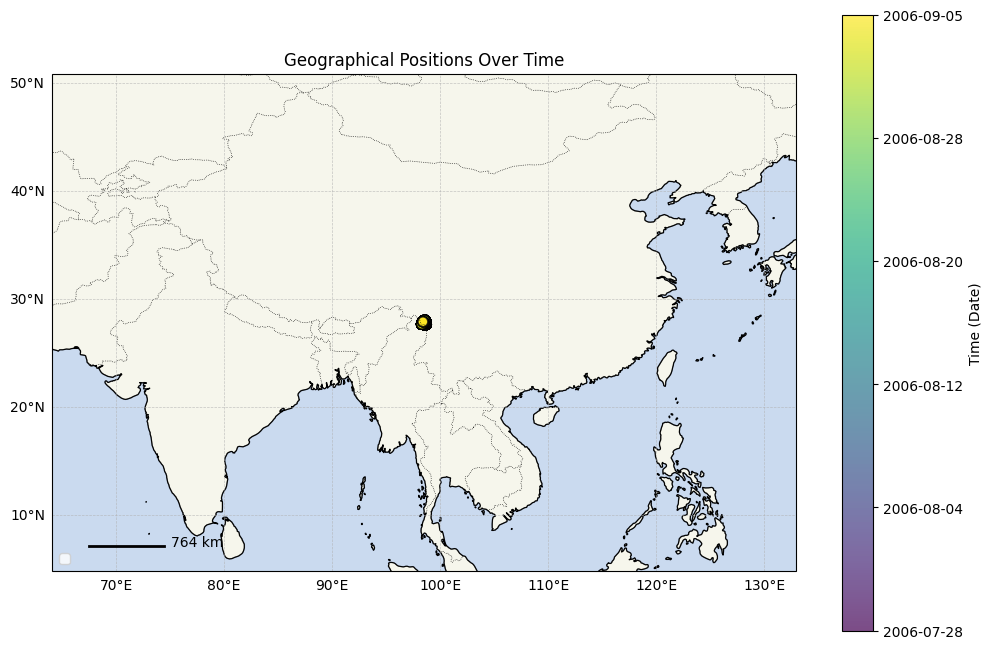

In [76]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.02, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


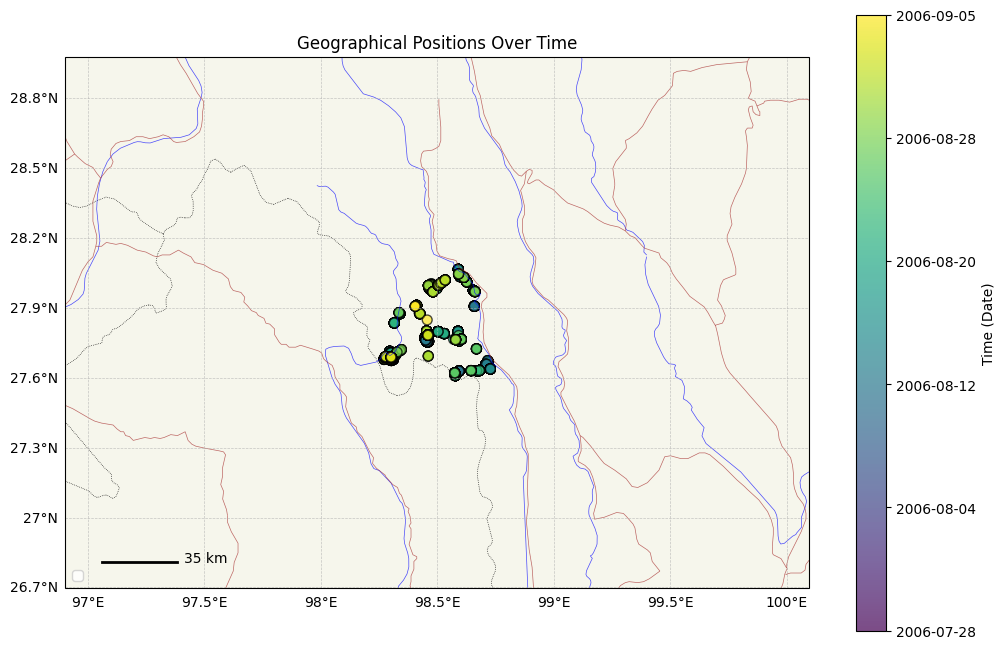

In [77]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


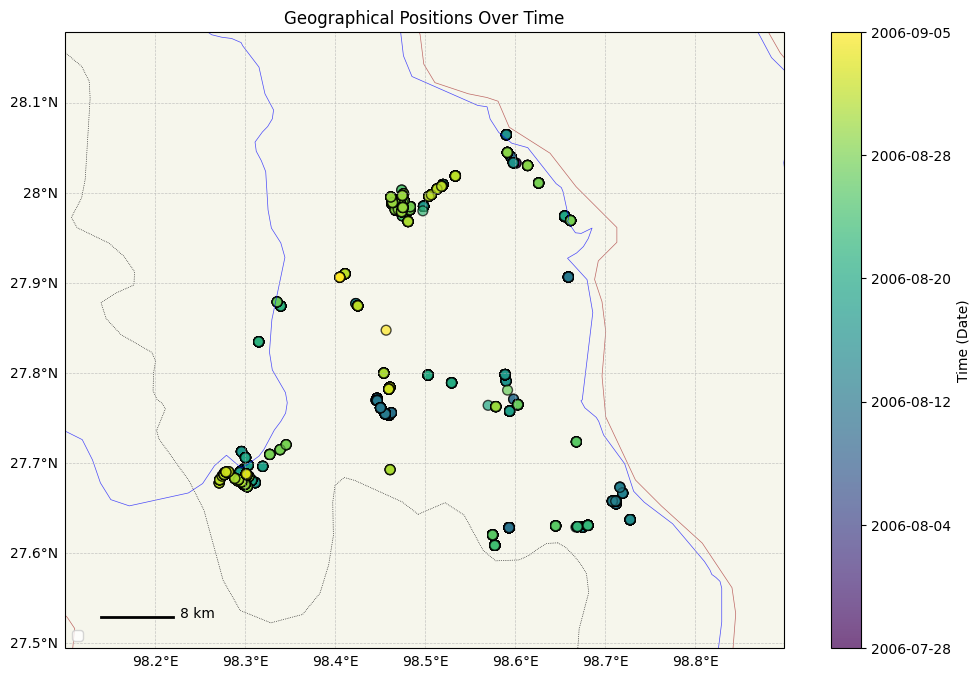

In [78]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


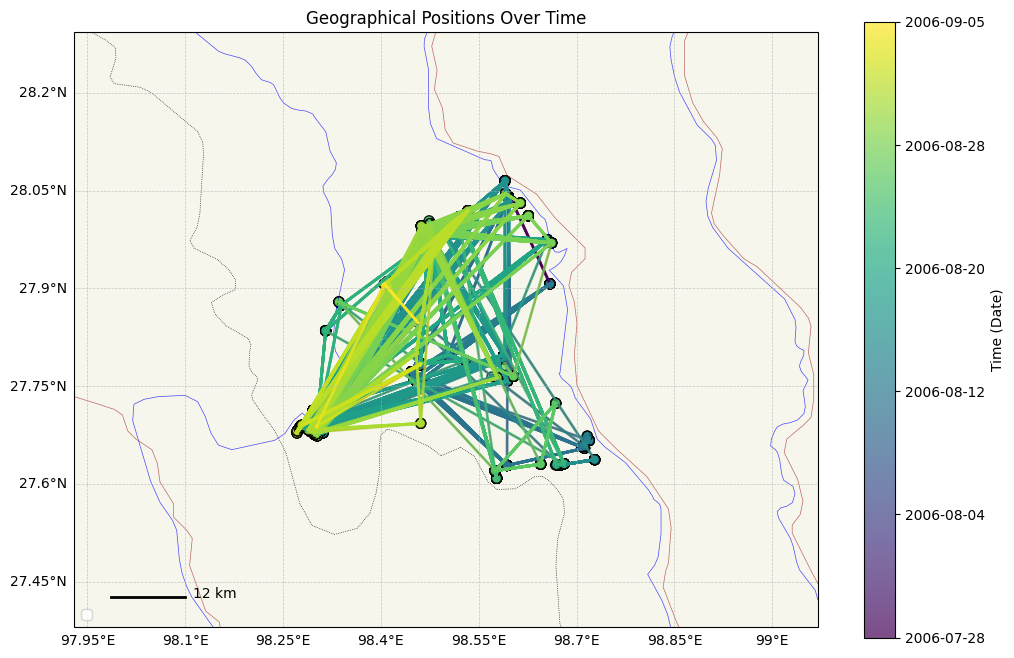

In [79]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

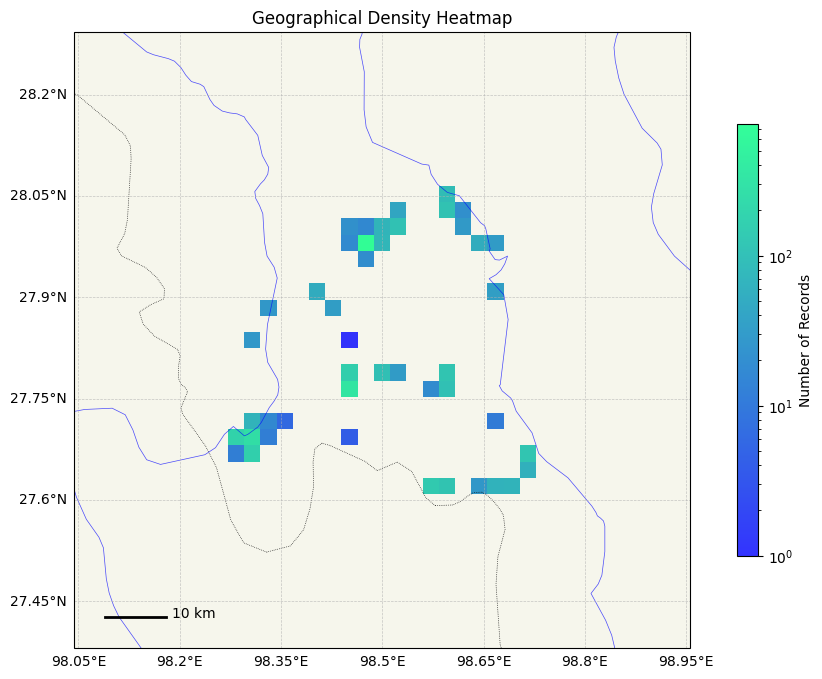

In [80]:
plot_geographical_heatmap(test_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


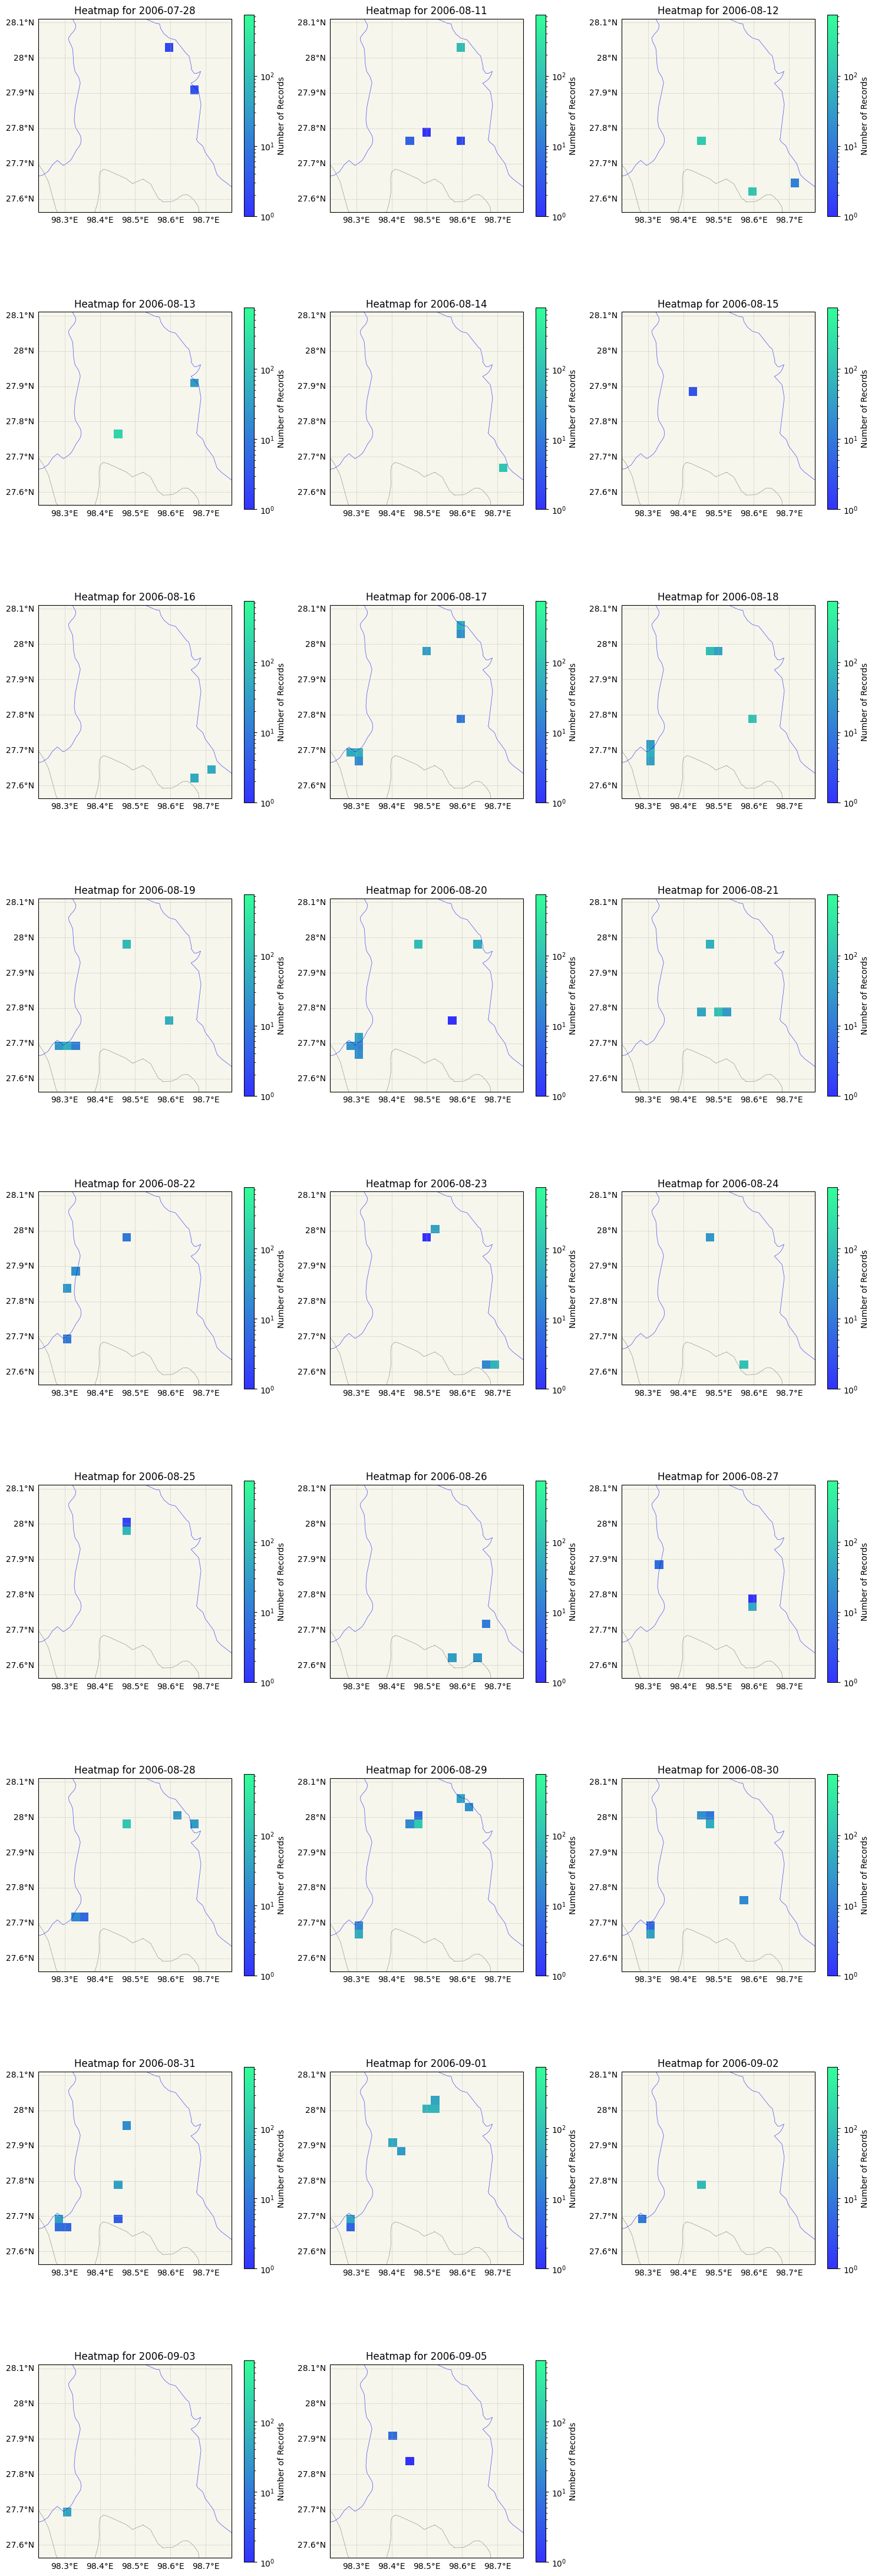

In [81]:
plot_geographical_heatmap_by_day(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                                 zoom=2, plot_rivers=True, plot_roads=True, grid_size=20)

3846 records, and it all looks like one cluster! - lets check it out as our first cluster

In [82]:
test_df.startdate.min()

Timestamp('2006-07-28 00:00:00')

### i.) Cluster 4: ('1998-10-20', '1998-11-08')

In [83]:
group0_df = test_df

group0_df

index  collectingeventid  startdate enddate  \
61750  144791.0           228278.0 2006-07-28     NaN   
49009  115182.0           181608.0 2006-07-28     NaN   
18128   42720.0            67969.0 2006-07-28     NaN   
60782  142565.0           224789.0 2006-07-28     NaN   
14039   32961.0            52708.0 2006-07-28     NaN   
...         ...                ...        ...     ...   
65513  149882.0           234661.0 2006-09-05     NaN   
65515  149884.0           234663.0 2006-09-05     NaN   
65516  149885.0           234664.0 2006-09-05     NaN   
65518  149887.0           234666.0 2006-09-05     NaN   
65517  149886.0           234665.0 2006-09-05     NaN   

                                                 remarks  localityid  \
61750  Sclerophyllous evergreen broadleaf forest, dis...    228278.0   
49009  Sclerophyllous evergreen broadleaf forest, dis...    181608.0   
18128  Sclerophyllous evergreen broadleaf forest, dis...     67969.0   
60782  Sclerophyllous evergreen broadleaf forest, dis...    224789.0   
14039  Sclerophyllous evergreen broadleaf forest, dis...     52708.0   
...                                                  ...         ...   
65513  Large valley with mixed evergreen broad-leaved...    234661.0   
65515  Large valley with mixed evergreen broad-leaved...    234663.0   
65516  Large valley with mixed evergreen broad-leaved...    234664.0   
65518  Large valley with mixed evergreen broad-leaved...    234666.0   
65517  Large valley with mixed evergreen broad-leaved...    234665.0   

      collectionobjectid                                              text1  \
61750             102399                     Tree 10 m tall. Flowers white.   
49009             211901           Tree 4-5 m tall. Fruit with brown hairs.   
18128             316073  Woody vine 2-3 m long. Flowers purplish pink. ...   
60782             186700                Tree 5-6 m tall. Young fruit green.   
14039             287589           Tree 5-8 m tall. Young fruit dark green.   
...                  ...                                                ...   
65513             387500                                                NaN   
65515             387502                                                NaN   
65516             387503                                                NaN   
65518             387505                                                NaN   
65517             387504                                                NaN   

       minelevation  maxelevation  ...  \
61750        1490.0           NaN  ...   
49009        1550.0           NaN  ...   
18128        1550.0           NaN  ...   
60782        1550.0           NaN  ...   
14039        1490.0           NaN  ...   
...             ...           ...  ...   
65513        2104.0           NaN  ...   
65515        2104.0           NaN  ...   
65516        2104.0           NaN  ...   
65518        2104.0           NaN  ...   
65517        2104.0           NaN  ...   

                                              namedplace  geographyid  \
61750                                                NaN      33268.0   
49009  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
18128  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
60782  Vicinity of Junindang Cun, ca. 26 km by road (...      33274.0   
14039                                                NaN      33268.0   
...                                                  ...          ...   
65513                                                NaN      33271.0   
65515                                                NaN      33271.0   
65516                                                NaN      33271.0   
65518                                                NaN      33271.0   
65517                                                NaN      33271.0   

       centroidlat centroidlon commonname  \
61750          NaN         NaN        NaN   
49009          NaN         NaN        N

In [84]:
group0_df.localityname.value_counts()

localityname
Vicinity of Danghatu near Km 49 on the road from Gongshan to Kongdang and ca. 20.4 direct km WNW of Gongshan on the E                        123
Vicinity of Heiwadi Qiao on the road from Gongshan to Kongdang, ca. 9.5 direct km NW of Gongshan on the E side of                            105
Vicinity of Cikeluo Qiao near Km 41 on the road from Gongshan to Kongdang and ca. 16.8 direct km WNW of Gongshan on the                       99
About 1.2 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang valley, E side of                       93
Near Yipsaka Lake, 2.1 direct km by SSE of the Heipa Pass tunnel on the new road from Gongshan to the Dulong Jiang                            78
                                                                                                                                            ... 
East slope of Gaoligong Shan, Nu Jiang (Salween) catchment, Nianwaluo He valley NW of Fucai.                         

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [85]:
df.loc[group0_df.index, "cluster"] = "4"
df[df.cluster == "4"].__len__()

3846

## d.) Collection Object ID: 164829

In [86]:
samp_colleventid_l[3]

74811

In [87]:
samp_record = df[df.collectingeventid == samp_colleventid_l[3]]
samp_record

index  collectingeventid  startdate enddate  \
19959  47042.0            74811.0 1995-08-03     NaN   

                                                 remarks  localityid  \
19959  Growing in deep shade on underside of boulder....     74811.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
19959             213535   NaN           NaN           NaN  ...   

                                            localityname  \
19959  Mount Robson Provincial Park area ca. 1 km sou...   

                                              namedplace  geographyid  \
19959  Mount Robson Provincial Park area ca. 1 km sou...        558.0   

      centroidlat centroidlon  commonname                  fullname  \
19959        54.0      -100.0         NaN  British Columbia, Canada   

                   name spatial_flag cluster  
19959  British Columbia          1.0     NaN  

[1 rows x 23 columns]

In [88]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 53.0333328247     lon: -119.2166671753     start date: 1995-08-03T00:00:00.000000000


In [89]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [90]:
test_df.head(2)

index  collectingeventid  startdate enddate  \
4099     9686.0            15695.0 1995-08-03     NaN   
45460  106808.0           168501.0 1995-08-03     NaN   

                                                 remarks  localityid  \
4099   Growing on shaded boulder face. Western Cedar ...     15695.0   
45460  Growing in mats on shaded boulder face. Wester...    168501.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
4099              172057   NaN           NaN           NaN  ...   
45460             152909   NaN           NaN           NaN  ...   

                                            localityname  \
4099   Mount Robson Provincial Park area ca. 2 km sou...   
45460  Mount Robson Provincial Park area ca. 2 km sou...   

                                              namedplace  geographyid  \
4099   Mount Robson Provincial Park area ca. 2 km sou...        558.0   
45460  Mount Robson Provincial Park area ca. 2 km sou...        558.0   

      centroidlat centroidlon  commonname                  fullname  \
4099         54.0      -100.0         NaN  British Columbia, Canada   
45460        54.0      -100.0         NaN  British Columbia, Canada   

                   name spatial_flag cluster  
4099   British Columbia          1.0     NaN  
45460  British Columbia          1.0     NaN  

[2 rows x 23 columns]

In [91]:
test_df.startdate.value_counts()

startdate
1995-08-03    59
Name: count, dtype: int64

In [92]:
test_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    28
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    25
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mt Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mount Robson Provincial Park area ca. 2 km south of Mt Robson information Center on the road to Mt. Robson Ranch.      1
Mt. Robson; ~2km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson - 2 km S of Information Center on road to Mt. Robson Ranch                                                  1
Name: count, dtype:

Okay, now there's very little variation in localityname. 
Its all Mt. Robson Ranch.

In [93]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1995-08-03 00:00:00']
Length: 1, dtype: datetime64[ns]

This all looks like one cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


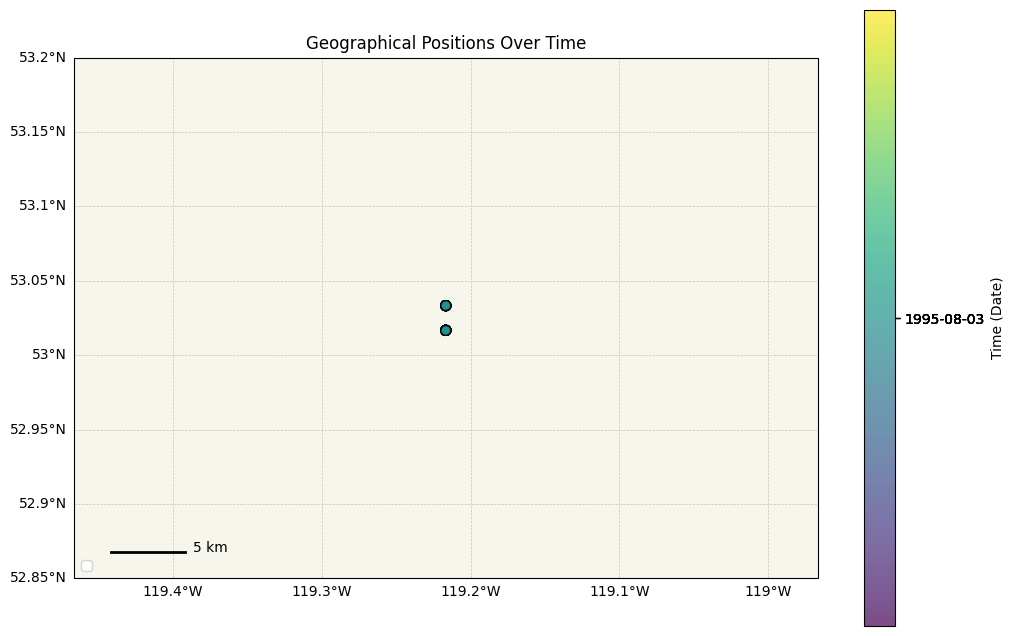

In [94]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


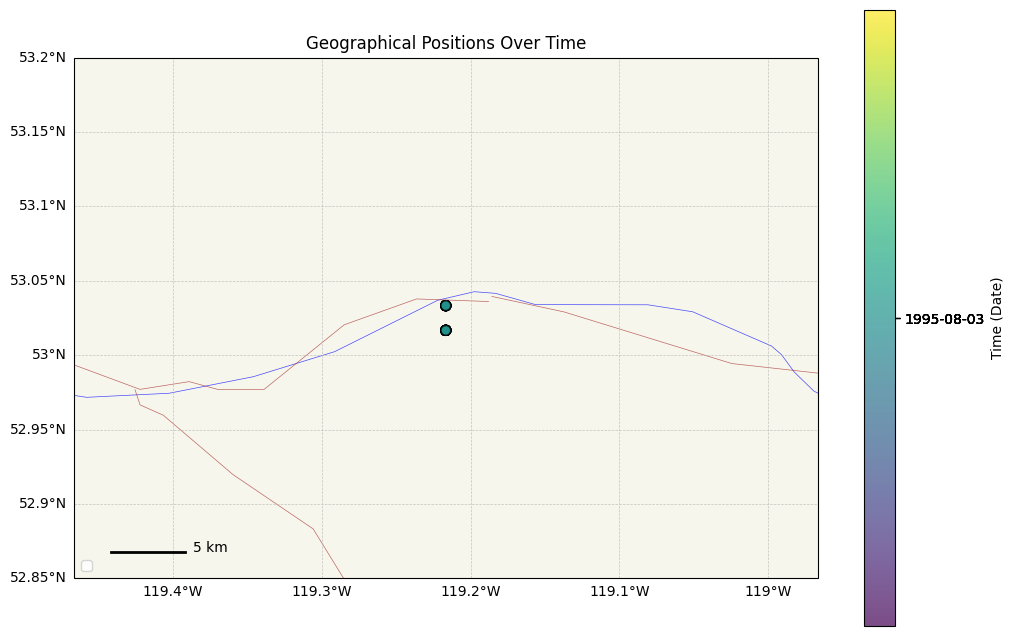

In [95]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


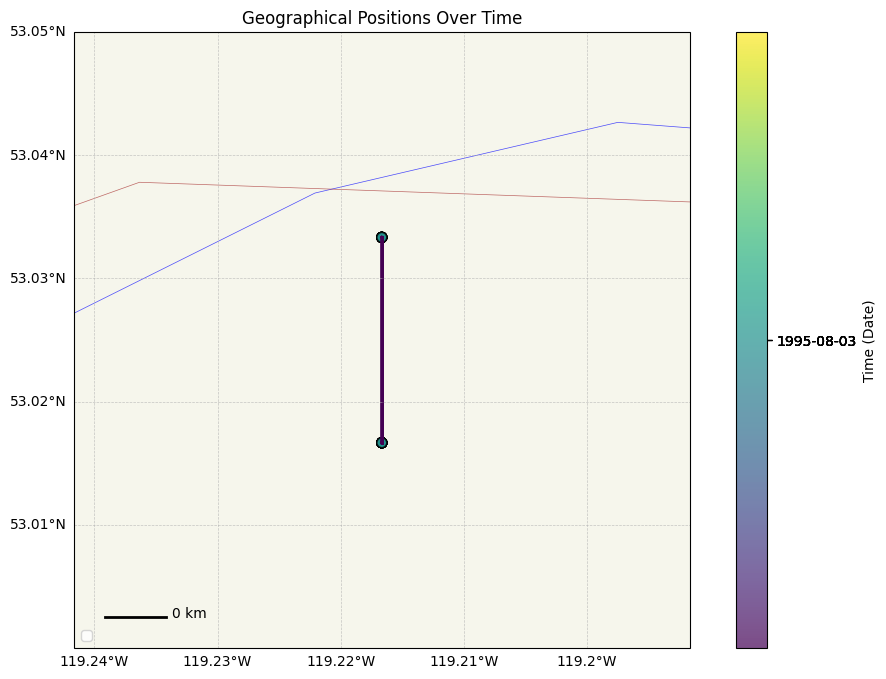

In [96]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

43 records, and it all looks like one cluster! - lets check it out as our first cluster

In [97]:
test_df.startdate.min()

Timestamp('1995-08-03 00:00:00')

### i.) Cluster 5: ('1998-10-20', '1998-11-08')

In [98]:
group0_df = test_df

In [99]:
group0_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    28
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.    25
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mt Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson; ~2 km S of Information Center on road to Mt. Robson Ranch.                                                 1
Mount Robson Provincial Park area ca. 2 km south of Mt Robson information Center on the road to Mt. Robson Ranch.      1
Mt. Robson; ~2km S of Information Center on road to Mt. Robson Ranch.                                                  1
Mt. Robson - 2 km S of Information Center on road to Mt. Robson Ranch                                                  1
Name: count, dtype:

In [100]:
df.loc[group0_df.index, "cluster"] = "5"
df[df.cluster == "5"].__len__()

59

## e.) Collection Object ID: 296037

In [101]:
samp_colleventid_l[4]

819069

In [102]:
# samp_record = df[df.collectionobjectid == samp_colleventid_l[4]]

samp_record = df[df.collectingeventid == samp_colleventid_l[4]]


samp_record

index  collectingeventid  startdate enddate  \
227468  641450.0           819069.0 2005-05-11     NaN   

                            remarks  localityid collectionobjectid text1  \
227468  On bare soil in mowed field    755260.0             984151   NaN   

        minelevation  maxelevation  ...  \
227468         500.0           NaN  ...   

                                       localityname  namedplace  geographyid  \
227468  Mullen Road. Hitchener Town Forest, Milford         NaN      12453.0   

       centroidlat centroidlon  commonname  \
227468       42.93      -71.72         NaN   

                                                 fullname  \
227468  Hillsborough County, New Hampshire, United States   

                       name spatial_flag cluster  
227468  Hillsborough County          1.0     NaN  

[1 rows x 23 columns]

In [103]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 42.8083333333     lon: -71.6836111111     start date: 2005-05-11T00:00:00.000000000


In [104]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [105]:
print(len(test_df))

test_df.head(2)

71


index  collectingeventid  startdate enddate  \
207980  601233.0           765200.0 2005-05-08     NaN   
200621  586912.0           746526.0 2005-05-08     NaN   

                                                  remarks  localityid  \
207980  On wet organic soil and rotten wood at the mar...    710441.0   
200621  Submerged and emergent on gravelly, sandy soil...    695876.0   

       collectionobjectid text1  minelevation  maxelevation  ...  \
207980             929022   NaN          60.0           NaN  ...   
200621             909989   NaN          60.0           NaN  ...   

                                             localityname  namedplace  \
207980  Near parking area for Mildford Township Souheg...         NaN   
200621  Banks of the Souhegen River near Milford Towns...         NaN   

        geographyid centroidlat centroidlon  commonname  \
207980      12453.0       42.93      -71.72         NaN   
200621      12453.0       42.93      -71.72         NaN   

                                                 fullname  \
207980  Hillsborough County, New Hampshire, United States   
200621  Hillsborough County, New Hampshire, United States   

                       name spatial_flag cluster  
207980  Hillsborough County          1.0     NaN  
200621  Hillsborough County          1.0     NaN  

[2 rows x 23 columns]

In [106]:
test_df.startdate.value_counts()

startdate
2005-05-09    19
2005-05-19    18
2005-05-10    13
2005-05-08     7
2005-05-11     7
2005-05-20     5
2005-05-18     1
2005-08-10     1
Name: count, dtype: int64

In [107]:
test_df.localityname.value_counts()

localityname
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis                                                                                                   5
Near the Milford township Souhegan River trail off North River Road, Milford                                                                                    3
Hitchener Town Forest, Milford                                                                                                                                  3
Tucker Brook Town Forest, Milford                                                                                                                               3
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis.                                                                                                  2
Souhegan River near the Milford Township Souhegan River Trail off the North River Road                                                                          2
Off Milford tow

Okay, now there's a fair amount of variability... 

In [108]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2005-05-08 00:00:00', '2005-05-09 00:00:00', '2005-05-10 00:00:00',
 '2005-05-11 00:00:00', '2005-05-18 00:00:00', '2005-05-19 00:00:00',
 '2005-05-20 00:00:00', '2005-08-10 00:00:00']
Length: 8, dtype: datetime64[ns]

In [109]:
cluster_date_l = [
    ("2005-05-08", "2005-05-20"),
    ("2005-08-10", "2005-08-10")
]

In [110]:
samp_record

index  collectingeventid  startdate enddate  \
227468  641450.0           819069.0 2005-05-11     NaN   

                            remarks  localityid collectionobjectid text1  \
227468  On bare soil in mowed field    755260.0             984151   NaN   

        minelevation  maxelevation  ...  \
227468         500.0           NaN  ...   

                                       localityname  namedplace  geographyid  \
227468  Mullen Road. Hitchener Town Forest, Milford         NaN      12453.0   

       centroidlat centroidlon  commonname  \
227468       42.93      -71.72         NaN   

                                                 fullname  \
227468  Hillsborough County, New Hampshire, United States   

                       name spatial_flag cluster  
227468  Hillsborough County          1.0     NaN  

[1 rows x 23 columns]

This looks like two separate clusters... One in May (which our sample record falls in) and one in August

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


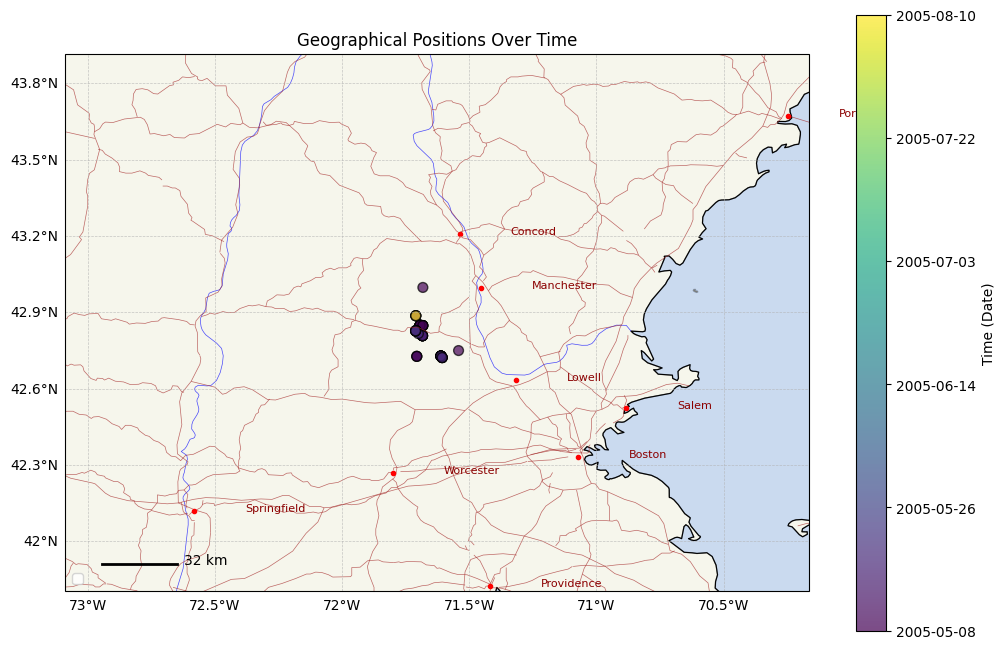

In [111]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.3, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

In [112]:
test_df.startdate.min()

Timestamp('2005-05-08 00:00:00')

In [113]:
cluster_date_l

[('2005-05-08', '2005-05-20'), ('2005-08-10', '2005-08-10')]

### i.) Cluster 6: ('2005-05-08', '2005-05-20')

In [114]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[0][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]


In [115]:
group0_df.localityname.value_counts()

localityname
Maple Hill Farm, Beaver Brook Association, Ridge Road, Hollis                                                                                                   5
Hitchener Town Forest, Milford                                                                                                                                  3
Tucker Brook Town Forest, Milford                                                                                                                               3
Near the Milford township Souhegan River trail off North River Road, Milford                                                                                    3
Souhegan River near the Milford Township Souhegan River Trail off the North River Road                                                                          2
Off Milford township Souhegan River trail off the North River Road, Milford                                                                                     2
Maple Hill Farm

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


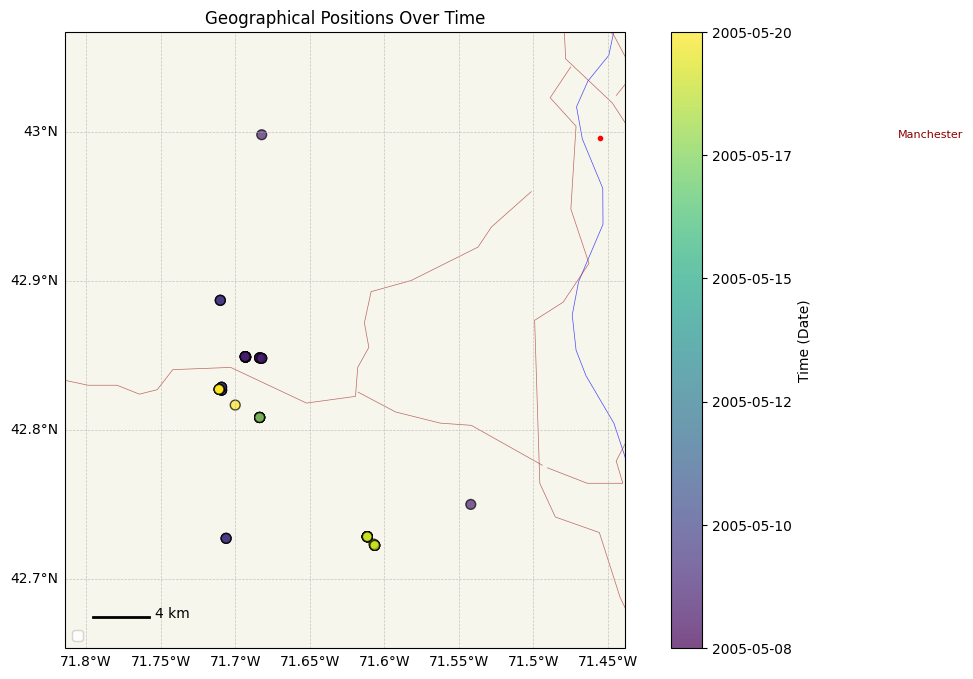

In [116]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


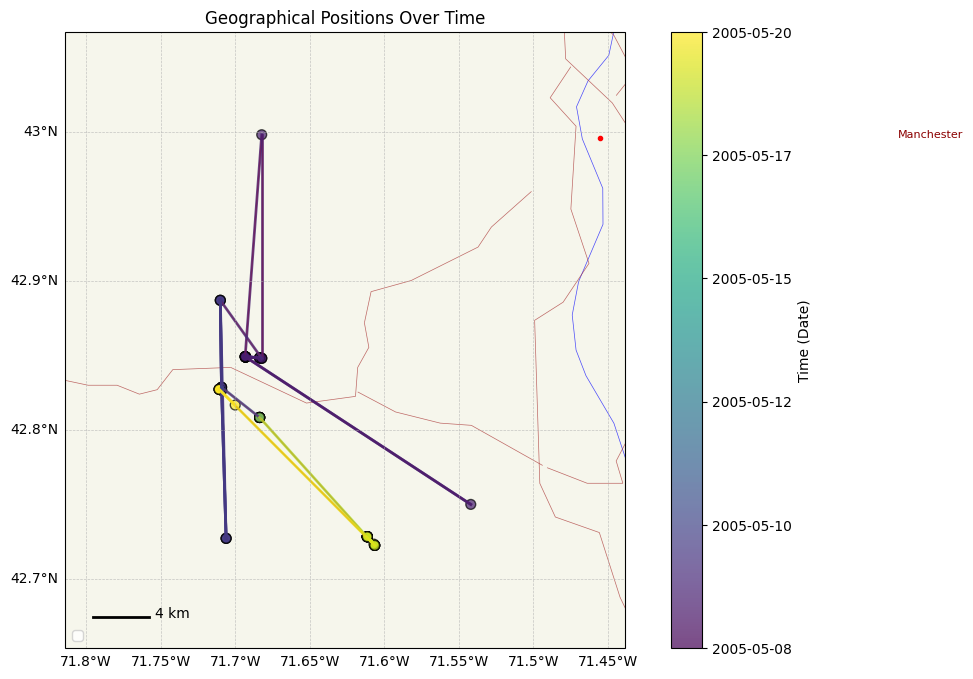

In [117]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Yikes this is all over the place. Maybe a couple teams collecting in different areas on the same day.

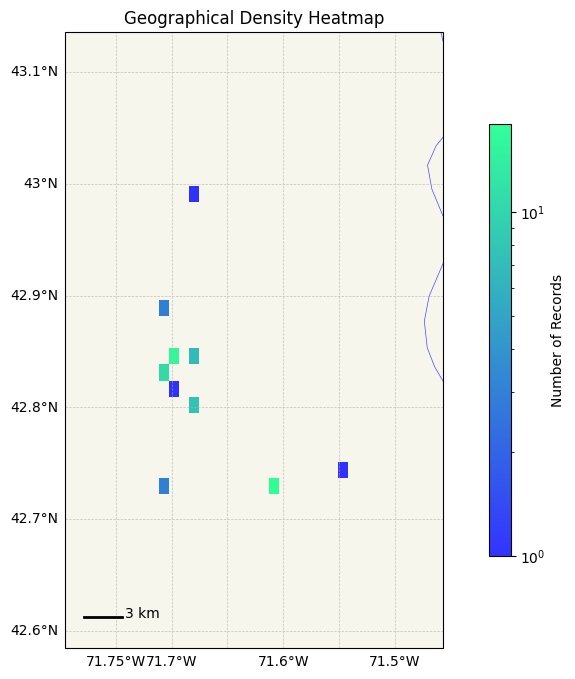

In [118]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


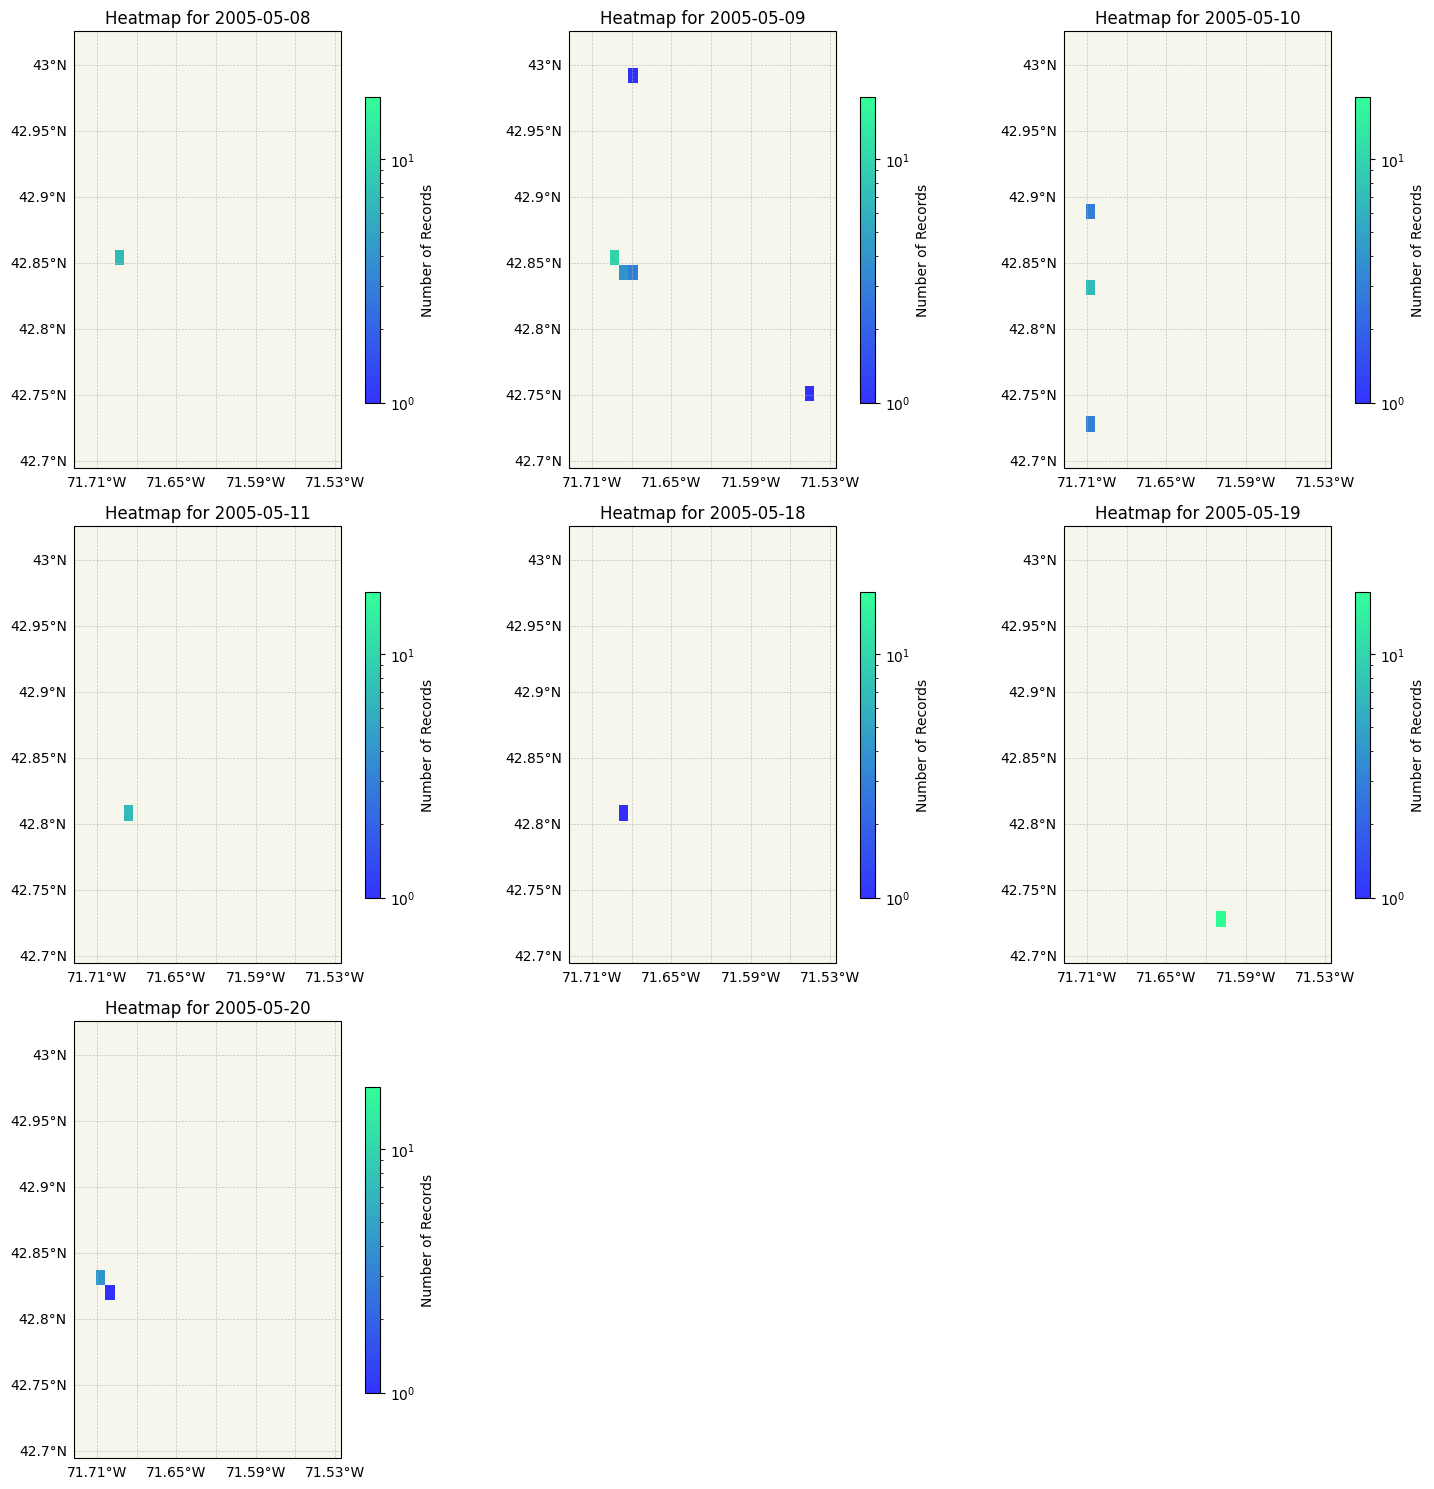

In [119]:
plot_geographical_heatmap_by_day(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [120]:
df.loc[group0_df.index, "cluster"] = "6"
df[df.cluster == "6"].__len__()

70

In [121]:
cluster_date_l

[('2005-05-08', '2005-05-20'), ('2005-08-10', '2005-08-10')]

### i.) Cluster 7: ('2005-08-10', '2005-08-10')

In [122]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[1][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

group0_df

latitude1  longitude1  \
211814  42.886944      -71.71   

                                                  remarks  \
211814  On dripping granitic cliff to the side of Purg...   

                                             localityname  startdate enddate  
211814  Near township line between Mont Vernon and Lyn... 2005-08-10     NaN

In [123]:
group0_df.localityname.value_counts()

localityname
Near township line between Mont Vernon and Lyndeborough.     1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


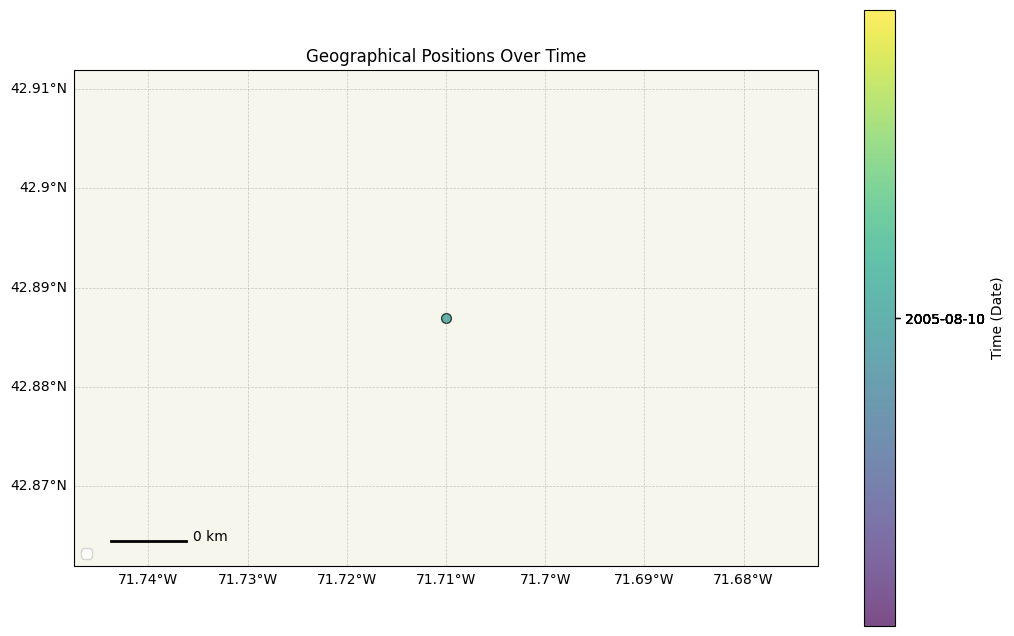

In [124]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


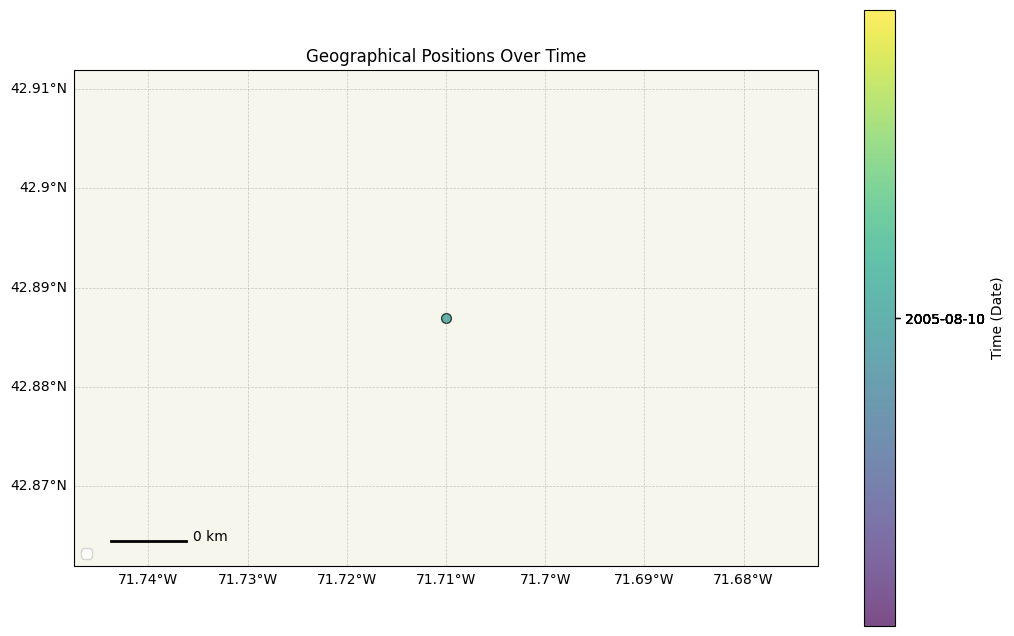

In [125]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Much more linear!

/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:856: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
/opt/anaconda3/envs/expedition-clustering/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:857: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


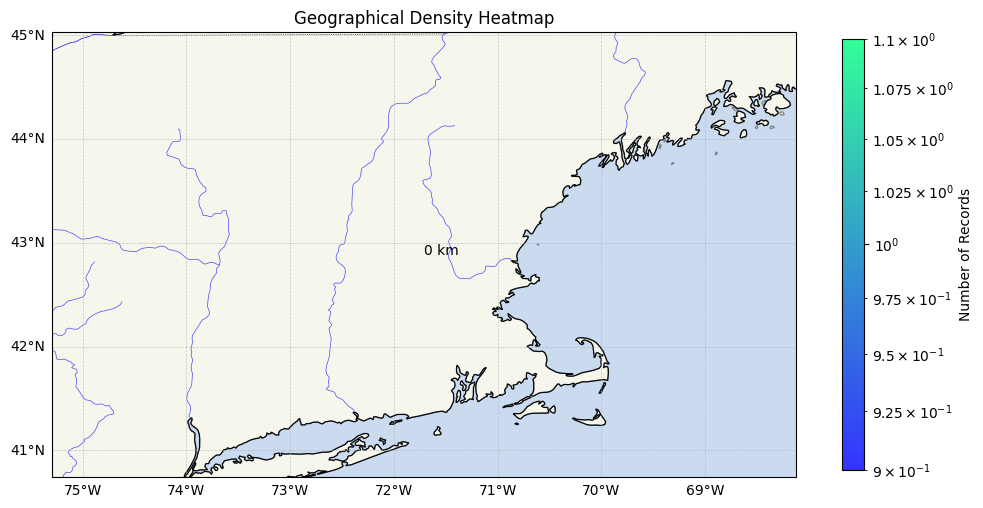

In [126]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [127]:
df.loc[group0_df.index, "cluster"] = "7"
df[df.cluster == "7"].__len__()

1

## f.) Collection Object ID: 244207

In [128]:
samp_colleventid_l[5]

126488

In [129]:
samp_record = df[df.collectingeventid == samp_colleventid_l[5]]
samp_record

index  collectingeventid  startdate     enddate remarks  localityid  \
34133  80063.0           126488.0 1934-03-04  1934-03-04     NaN    126488.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
34133             244207   NaN           NaN           NaN  ...   

                         localityname  namedplace  geographyid centroidlat  \
34133  2 miles east of Mendocino City         NaN      16880.0       39.42   

      centroidlon  commonname                                     fullname  \
34133      -100.0         NaN  Mendocino County, California, United States   

                   name spatial_flag cluster  
34133  Mendocino County          1.0     NaN  

[1 rows x 23 columns]

In [130]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: 39.3111     lon: -123.7615     start date: 1934-03-04T00:00:00.000000000


In [131]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [132]:
print(len(test_df))

test_df.head(2)

36


index  collectingeventid  startdate     enddate  \
42952  100890.0           159124.0 1933-11-07  1933-11-07   
70953  161342.0           247552.0 1933-11-07         NaN   

                      remarks  localityid collectionobjectid  \
42952                     NaN    159124.0              13335   
70953  In open grassy fields.    249961.0             400526   

                                                   text1  minelevation  \
42952  Trees 20-50 ft. high; foliage a vivid green wi...           NaN   
70953                Low coarse shrub 1 m. or less high.           NaN   

       maxelevation  ...             localityname  namedplace  geographyid  \
42952           NaN  ...  5 mi. N. of Point Arena         NaN      16880.0   
70953           NaN  ...  5 mi. N. of Point Arena         NaN      16880.0   

      centroidlat centroidlon  commonname  \
42952       39.42      -100.0         NaN   
70953       39.42      -100.0         NaN   

                                          fullname              name  \
42952  Mendocino County, California, United States  Mendocino County   
70953  Mendocino County, California, United States  Mendocino County   

      spatial_flag cluster  
42952          1.0     NaN  
70953          1.0     NaN  

[2 rows x 23 columns]

In [133]:
test_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                          7
6 miles south of Point Arena                            5
5 mi. N. of Point Arena                                 4
2 miles east of Mendocino                               2
5 mi. n. of Point Arena.                                2
White plains three miles east of Mendocino City         2
6 mi. s. of Point Arena.                                2
6 mi. s of Point Arena.                                 1
Along Navarro River, 5 miles west of Navarro.           1
5 mi. N. of Point Arena.                                1
Along Navarro River 5 miles west of Navarro.            1
Mendocino City                                          1
About 5 miles west of Branscomb, on road to Westport    1
Along roadside fronting the ocean, near Westport.       1
Six miles south of Point Arena                          1
Mendocino.                                              1
4 4/10 mi. from Rockport                                1
W

Okay, now there's a fair amount of variability... 

In [134]:
test_df.startdate.value_counts()

startdate
1934-03-04    13
1934-03-03     8
1933-11-07     7
1934-09-03     3
1934-06-30     2
1934-05-29     1
1934-05-30     1
1934-06-09     1
Name: count, dtype: int64

It looks like there are a number of different clusters here.

In [135]:
test_df.startdate.unique()

<DatetimeArray>
['1933-11-07 00:00:00', '1934-03-03 00:00:00', '1934-03-04 00:00:00',
 '1934-05-29 00:00:00', '1934-05-30 00:00:00', '1934-06-09 00:00:00',
 '1934-06-30 00:00:00', '1934-09-03 00:00:00']
Length: 8, dtype: datetime64[ns]

In [136]:
cluster_date_l = [
    ("1933-11-07", "1933-11-07"),
    ("1934-03-03", "1934-03-04"),
    ("1934-06-09", "1934-06-09"),
    ("1934-06-30", "1934-06-30"),
    ("1934-09-03", "1934-09-03"),
]

In [137]:
samp_record

index  collectingeventid  startdate     enddate remarks  localityid  \
34133  80063.0           126488.0 1934-03-04  1934-03-04     NaN    126488.0   

      collectionobjectid text1  minelevation  maxelevation  ...  \
34133             244207   NaN           NaN           NaN  ...   

                         localityname  namedplace  geographyid centroidlat  \
34133  2 miles east of Mendocino City         NaN      16880.0       39.42   

      centroidlon  commonname                                     fullname  \
34133      -100.0         NaN  Mendocino County, California, United States   

                   name spatial_flag cluster  
34133  Mendocino County          1.0     NaN  

[1 rows x 23 columns]

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


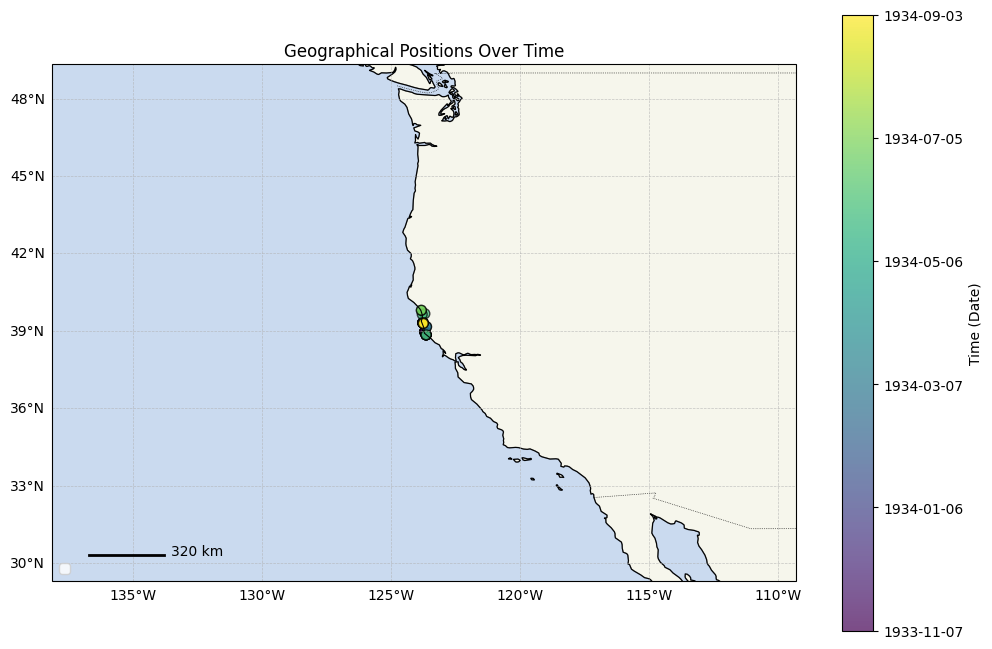

In [138]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


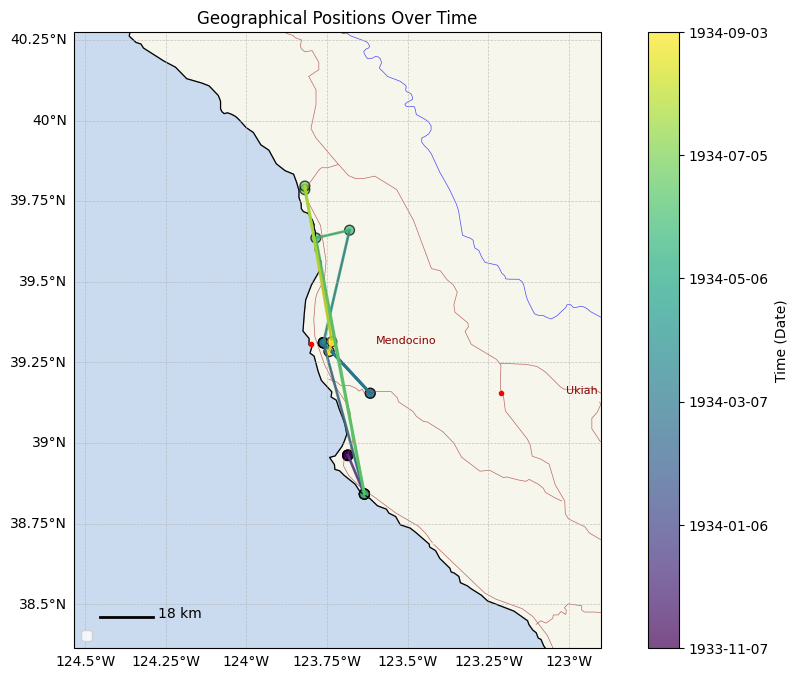

In [139]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [140]:
test_df.startdate.min()

Timestamp('1933-11-07 00:00:00')

In [141]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### i.) Cluster 8: ('1933-11-07', '1934-03-04')

In [142]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[0][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

group0_df

latitude1  longitude1  \
42952  38.963142 -123.685661   
70953  38.961500 -123.686200   
70951  38.961500 -123.686200   
75433  38.961400 -123.686100   
48888  38.962300 -123.686700   
37595  38.962300 -123.686700   
25398  38.963142 -123.685661   

                                                 remarks  \
42952                                                NaN   
70953                             In open grassy fields.   
70951                             In open grassy fields.   
75433  In open grassy fields with Madia dissitiflora ...   
48888                                 On edge of forest.   
37595                             In open grassy fields.   
25398                                                NaN   

                   localityname  startdate     enddate  
42952   5 mi. N. of Point Arena 1933-11-07  1933-11-07  
70953   5 mi. N. of Point Arena 1933-11-07         NaN  
70951   5 mi. N. of Point Arena 1933-11-07         NaN  
75433   5 mi. N. of Point Arena 1933-11-07         NaN  
48888  5 mi. n. of Point Arena. 1933-11-07  1933-11-07  
37595  5 mi. n. of Point Arena. 1933-11-07  1933-11-07  
25398  5 mi. N. of Point Arena. 1933-11-07  1933-11-07

In [143]:
group0_df.localityname.value_counts()

localityname
5 mi. N. of Point Arena     4
5 mi. n. of Point Arena.    2
5 mi. N. of Point Arena.    1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


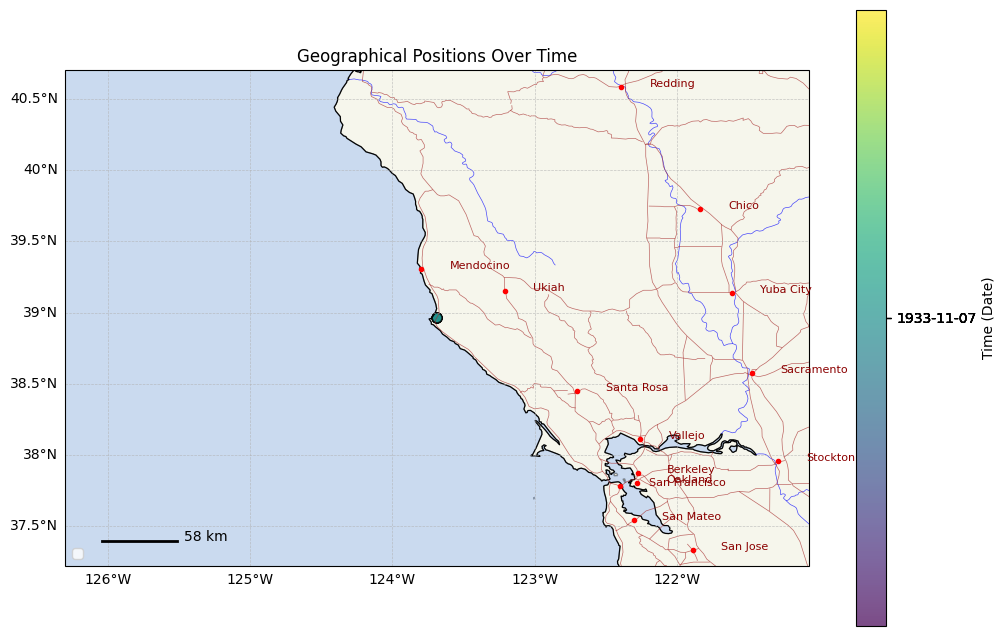

In [144]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=.001, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


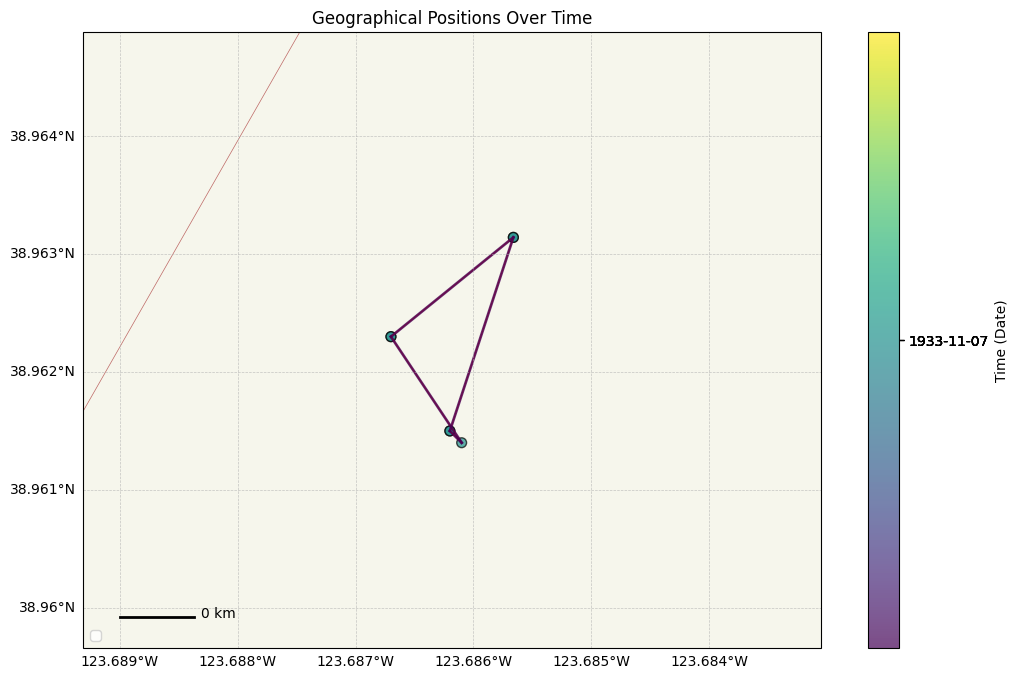

In [145]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

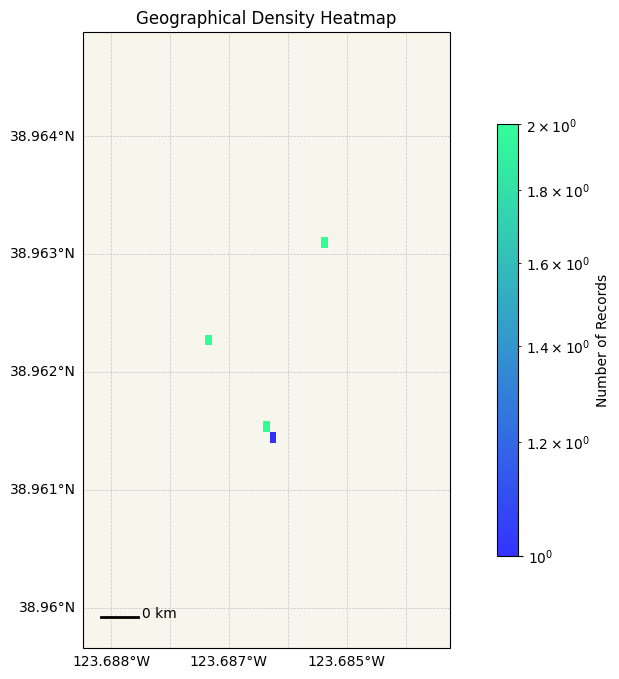

In [146]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [147]:
df.loc[group0_df.index, "cluster"] = "8"
df[df.cluster == "8"].__len__()

7

In [148]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### ii.) Cluster 9: ('1934-03-03', '1934-03-04')

In [149]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df["startdate"]) & (test_df["startdate"] <= pd.to_datetime(cluster_date_l[1][1]))][["latitude1", "longitude1", "remarks", "localityname", "startdate", "enddate"]]

group0_df

latitude1  longitude1      remarks  \
1945     38.8421   -123.6345          NaN   
37167    38.8421   -123.6345          NaN   
58233    38.8421   -123.6345          NaN   
4195     38.8421   -123.6345          NaN   
41015    38.8421   -123.6345          NaN   
3954     38.8421   -123.6345          NaN   
8712     38.8421   -123.6345          NaN   
41014    38.8421   -123.6345          NaN   
18249    39.3111   -123.7615          NaN   
58445    39.3111   -123.7615          NaN   
34133    39.3111   -123.7615          NaN   
39005    39.3111   -123.7615          NaN   
60206    39.1546   -123.6164          NaN   
46328    39.3111   -123.7615          NaN   
44723    39.3111   -123.7615          NaN   
18519    39.3111   -123.7615          NaN   
11245    39.3111   -123.7615          NaN   
6559     39.3111   -123.7615          NaN   
45124    39.1546   -123.6164  Along river   
47906    39.3111   -123.7615          NaN   
77208    39.3111   -123.7615          NaN   

                                        localityname  startdate     enddate  
1945                         6 mi. s of Point Arena. 1934-03-03  1934-03-03  
37167                   6 miles south of Point Arena 1934-03-03  1934-03-03  
58233                   6 miles south of Point Arena 1934-03-03  1934-03-03  
4195                        6 mi. s. of Point Arena. 1934-03-03  1934-03-03  
41015                   6 miles south of Point Arena 1934-03-03  1934-03-03  
3954                    6 miles south of Point Arena 1934-03-03  1934-03-03  
8712                        6 mi. s. of Point Arena. 1934-03-03  1934-03-03  
41014                   6 miles south of Point Arena 1934-03-03  1934-03-03  
18249                      2 miles east of Mendocino 1934-03-04  1934-03-04  
58445                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
34133                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
39005                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
60206  Along Navarro River, 5 miles west of Navarro. 1934-03-04  1934-03-04  
46328                                Mendocino City. 1934-03-04  1934-03-04  
44723                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
18519                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
11245                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
6559                       2 miles east of Mendocino 1934-03-04  1934-03-04  
45124   Along Navarro River 5 miles west of Navarro. 1934-03-04  1934-03-04  
47906                 2 miles east of Mendocino City 1934-03-04  1934-03-04  
77208                                 Mendocino City 1934-03-04         NaN

In [150]:
group0_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                   7
6 miles south of Point Arena                     5
6 mi. s. of Point Arena.                         2
2 miles east of Mendocino                        2
6 mi. s of Point Arena.                          1
Along Navarro River, 5 miles west of Navarro.    1
Mendocino City.                                  1
Along Navarro River 5 miles west of Navarro.     1
Mendocino City                                   1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


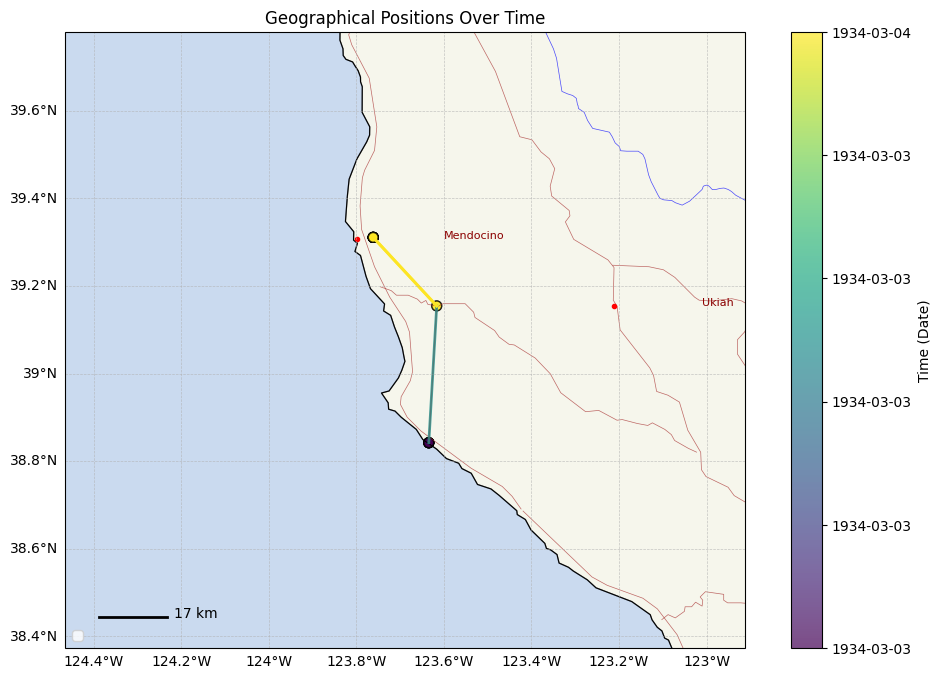

In [151]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

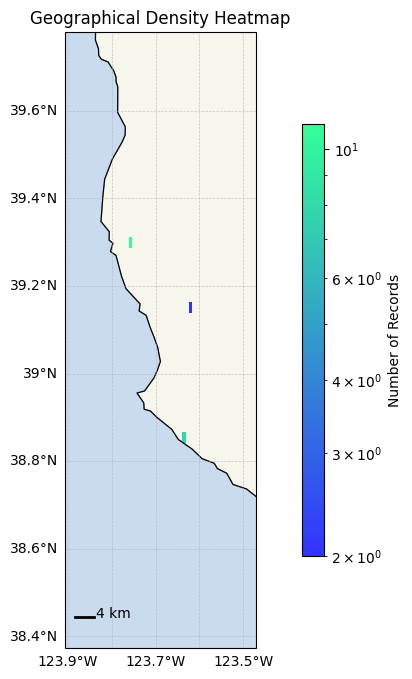

In [152]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


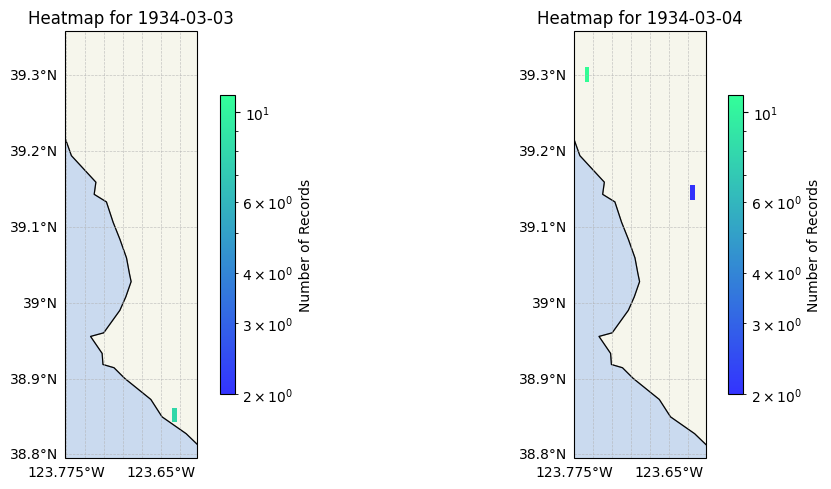

In [153]:
plot_geographical_heatmap_by_day(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [154]:
df.loc[group0_df.index, "cluster"] = "9"
df[df.cluster == "9"].__len__()

21

## f.) Collecting Event ID: 78191

Grabbing a random madagascar one!

In [155]:
samp_colleventid_l[6]

78191

In [156]:
samp_record = df[df.collectingeventid == samp_colleventid_l[6]]
samp_record

index  collectingeventid  startdate enddate remarks  localityid  \
20974  49225.0            78191.0 1998-11-18     NaN     NaN     78191.0   

      collectionobjectid                                      text1  \
20974             367908  Terrestrial herb 0.5 m, flowers lavander.   

       minelevation  maxelevation  ...  \
20974        1150.0        1250.0  ...   

                                            localityname  namedplace  \
20974  Fianarantsoa, Ranomafana National Park, Ampasi...         NaN   

       geographyid centroidlat centroidlon  commonname  \
20974      27773.0         NaN         NaN         NaN   

                       fullname          name spatial_flag cluster  
20974  Fianarantsoa, Madagascar  Fianarantsoa          1.0     NaN  

[1 rows x 23 columns]

In [157]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print("lat:", samp_record_lat, "    lon:", samp_record_lon, "    start date:", samp_record_startdate)

lat: -21.2333297729     lon: 47.3833389282     start date: 1998-11-18T00:00:00.000000000


In [158]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by="startdate")

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df["startdate"].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [159]:
print(len(test_df))

test_df.head(2)

1072


index  collectingeventid  startdate     enddate remarks  localityid  \
8680    20377.0            32671.0 1998-10-30  1998-10-30     NaN     32671.0   
48532  114059.0           179832.0 1998-10-30         NaN     NaN    179832.0   

      collectionobjectid                                    text1  \
8680              345584              Low herb adjacent to river.   
48532             135804  Pendant perennial on rocks along river.   

       minelevation  maxelevation  ...  \
8680          869.0         869.0  ...   
48532           0.0           NaN  ...   

                                            localityname  \
8680   Ranomafana Ntl Park. Talatakely Trail System, ...   
48532  Fianarantsoa, Ranomafana National Park, Talata...   

                                              namedplace  geographyid  \
8680   Fianarantsoa Province: Ranomafana National Par...      27773.0   
48532                                                NaN      27773.0   

      centroidlat centroidlon  commonname                  fullname  \
8680          NaN         NaN         NaN  Fianarantsoa, Madagascar   
48532         NaN         NaN         NaN  Fianarantsoa, Madagascar   

               name spatial_flag cluster  
8680   Fianarantsoa          1.0     NaN  
48532  Fianarantsoa          1.0     NaN  

[2 rows x 23 columns]

In [160]:
test_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     47
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            43
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            35
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            35
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              27
                                                                                                                            ..
Fianarantsoa Province. Just E of the entrance to the ecological monitoring station along the road to Ranamofana              1
Ranomafana National Park. Talatakely Trail System. Trail B upslope to trail TBT to its intersectio

Okay, now there's a fair amount of variability... 

In [161]:
test_df.startdate.value_counts()

startdate
1998-11-04    103
1998-11-01     97
1998-11-18     90
1998-11-09     73
1998-11-03     70
1998-11-12     69
1998-11-05     61
1998-11-11     56
1998-10-31     53
1998-11-14     51
1998-11-02     50
1998-11-06     49
1998-10-30     44
1998-11-10     43
1998-11-13     42
1998-11-15     40
1998-11-16     28
1998-11-08     26
1998-11-17     14
1998-11-07      6
1998-11-19      4
1998-11-21      3
Name: count, dtype: int64

It looks like there is a single cluster

In [162]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1998-10-30 00:00:00', '1998-10-31 00:00:00', '1998-11-01 00:00:00',
 '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00',
 '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-07 00:00:00',
 '1998-11-08 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00',
 '1998-11-11 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00',
 '1998-11-14 00:00:00', '1998-11-15 00:00:00', '1998-11-16 00:00:00',
 '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00',
 '1998-11-21 00:00:00']
Length: 22, dtype: datetime64[ns]

In [163]:
samp_record

index  collectingeventid  startdate enddate remarks  localityid  \
20974  49225.0            78191.0 1998-11-18     NaN     NaN     78191.0   

      collectionobjectid                                      text1  \
20974             367908  Terrestrial herb 0.5 m, flowers lavander.   

       minelevation  maxelevation  ...  \
20974        1150.0        1250.0  ...   

                                            localityname  namedplace  \
20974  Fianarantsoa, Ranomafana National Park, Ampasi...         NaN   

       geographyid centroidlat centroidlon  commonname  \
20974      27773.0         NaN         NaN         NaN   

                       fullname          name spatial_flag cluster  
20974  Fianarantsoa, Madagascar  Fianarantsoa          1.0     NaN  

[1 rows x 23 columns]

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


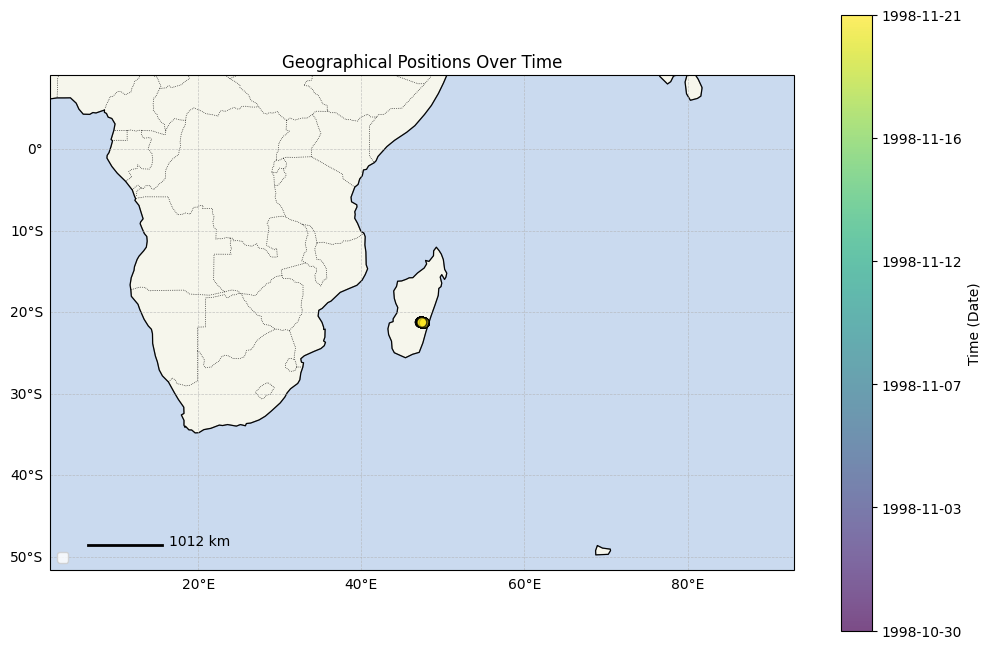

In [164]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=0.01, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


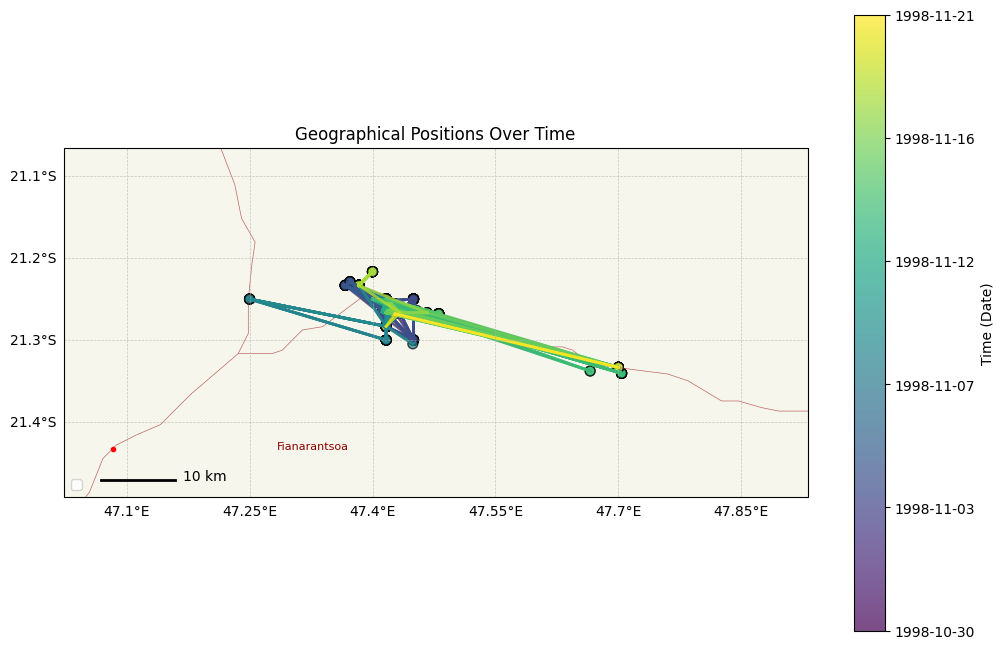

In [165]:
plot_geographical_positions(test_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [166]:
print(test_df.startdate.min())
print(test_df.startdate.max())

1998-10-30 00:00:00
1998-11-21 00:00:00


### i.) Cluster 10: ('1998-10-30', '1998-11-21')

In [167]:
group0_df = test_df

group0_df

index  collectingeventid  startdate     enddate  \
8680    20377.0            32671.0 1998-10-30  1998-10-30   
48532  114059.0           179832.0 1998-10-30         NaN   
19168   45197.0            71930.0 1998-10-30  1998-10-30   
18386   43403.0            69057.0 1998-10-30         NaN   
55963  131378.0           207084.0 1998-10-30  1998-10-30   
...         ...                ...        ...         ...   
12032   28212.0            45202.0 1998-11-19         NaN   
36680   86117.0           135994.0 1998-11-19         NaN   
42398   99563.0           157069.0 1998-11-21         NaN   
56821  133401.0           210313.0 1998-11-21  1998-11-21   
62416  146344.0           230689.0 1998-11-21  1998-11-21   

                                   remarks  localityid collectionobjectid  \
8680                                   NaN     32671.0             345584   
48532                                  NaN    179832.0             135804   
19168                                  NaN     71930.0              59757   
18386                                  NaN     69057.0             324518   
55963                                  NaN    207084.0             171958   
...                                    ...         ...                ...   
12032                                  NaN     45202.0             351096   
36680                                  NaN    135994.0             342692   
42398  Disturbed remnant forest patches.      157069.0              21675   
56821                      Common, shaded.    210313.0             318674   
62416                                  NaN    230689.0             139591   

                                                   text1  minelevation  \
8680                         Low herb adjacent to river.         869.0   
48532            Pendant perennial on rocks along river.           0.0   
19168  Epiphytic herb concealing tree trunk from grou...         869.0   
18386  Small tree 3 m tall. Fruits at first white the...         869.0   
55963  Twining vine with branches to 2 m long. Floret...         869.0   
...                                                  ...           ...   
12032  Female. Stems solitary, 40 cm DBH* leaf rachis...        1100.0   
36680  Tree 3 m, flowers greenish-yellow, inflorescen...        1100.0   
42398       Tree 4 m, fruits green, extremely glutinous.        1500.0   
56821  Tree 2.5 m (to 3 m in the area)* trunk straigh...         900.0   
62416  Shrub to 0.5 m. Branches horizontally held and...           0.0   

       maxelevation  ...                                       localityname  \
8680          869.0  ...  Ranomafana Ntl Park. Talatakely Trail System, ...   
48532           NaN  ...  Fianarantsoa, Ranomafana National Park, Talata...   
19168         869.0  ...  Fianarantsoa Province: Ranomafana National Par...   
18386           0.0  ...  Fianarantsoa Province: Ranomafana National Par...   
55963         869.0  ...  Fianarantsoa Province: Ranomafana National Par...   
...             ...  ...                                                ...   
12032        1200.0  ...  Fianarantsoa, Ranomafana National Park, Vatoha...   
36680        1200.0  ...  Fianarantsoa, Ranomafana National Park, Vatoha...   
42398        1700.0  ...  Fianarantsoa, 12 km E of Ifanadiana, 1 km N of...   
56821        1100.0  ...  Fianarantsoa Province. Ranamofana National Par...   
62416           0.0  ...  Fianarantsoa Province. Ranamofana National Par...   

                                              namedplace  geographyid  \
8680   Fianarantsoa Province: Ranomafana National Par...      27773.0   
48532                                                NaN      27773.0   
19168  Fianarantsoa Province: Ranomafana National Par...      27773.0   
18386  Fianarantsoa Province: Ranomafana National Par...      27773.0   
55963  Fianarantsoa Province: Ranomafana National Par...      27773.0   
...                                                  ...          ...   
120

In [168]:
group0_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     47
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            43
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            35
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            35
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              27
                                                                                                                            ..
Fianarantsoa Province. Just E of the entrance to the ecological monitoring station along the road to Ranamofana              1
Ranomafana National Park. Talatakely Trail System. Trail B upslope to trail TBT to its intersectio

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


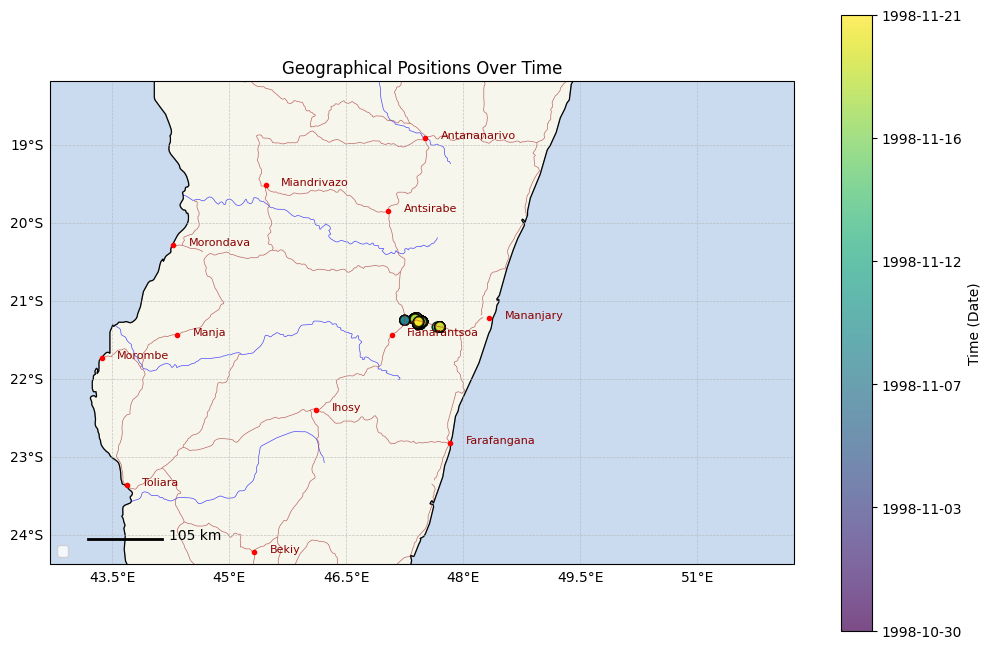

In [169]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=.1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


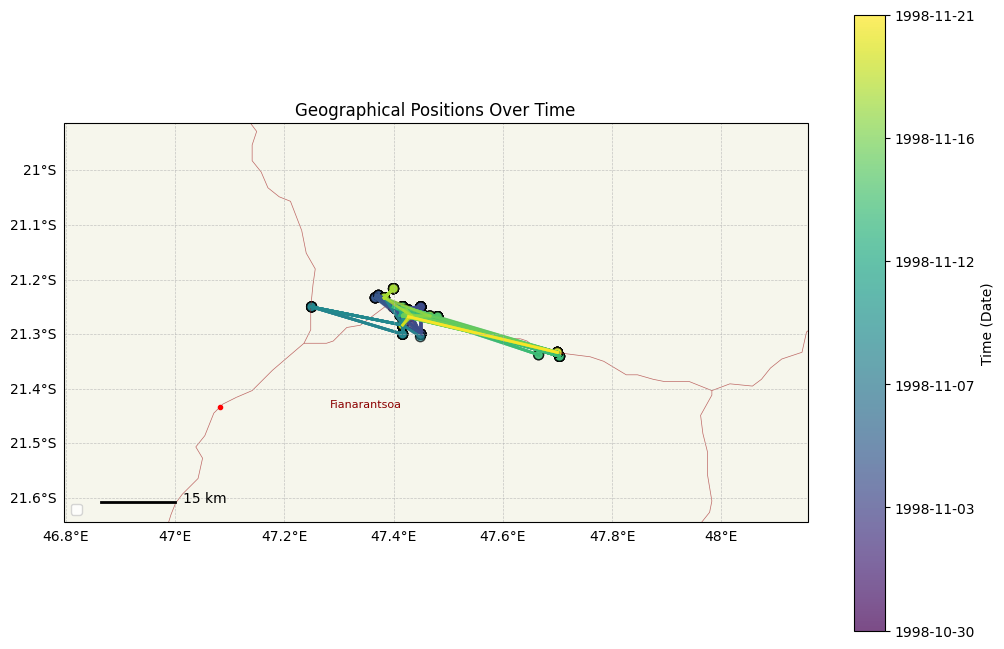

In [170]:
plot_geographical_positions(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

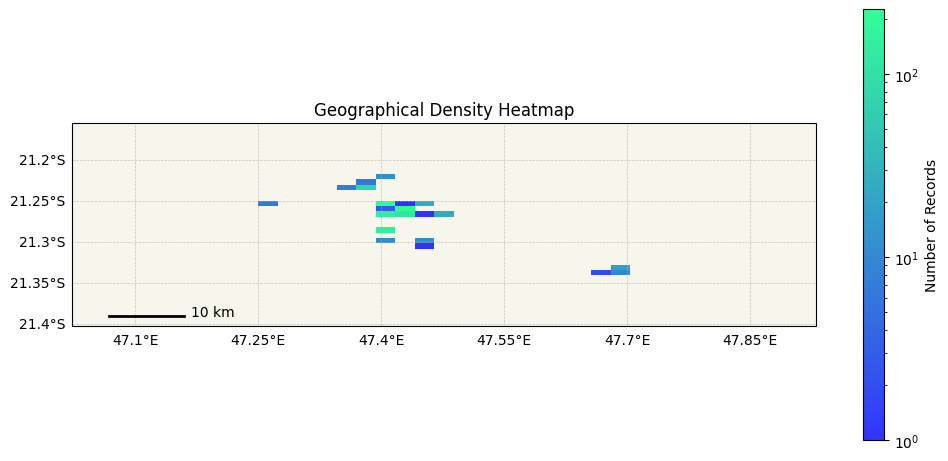

In [171]:
plot_geographical_heatmap(group0_df, lat_col="latitude1", lon_col="longitude1", grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


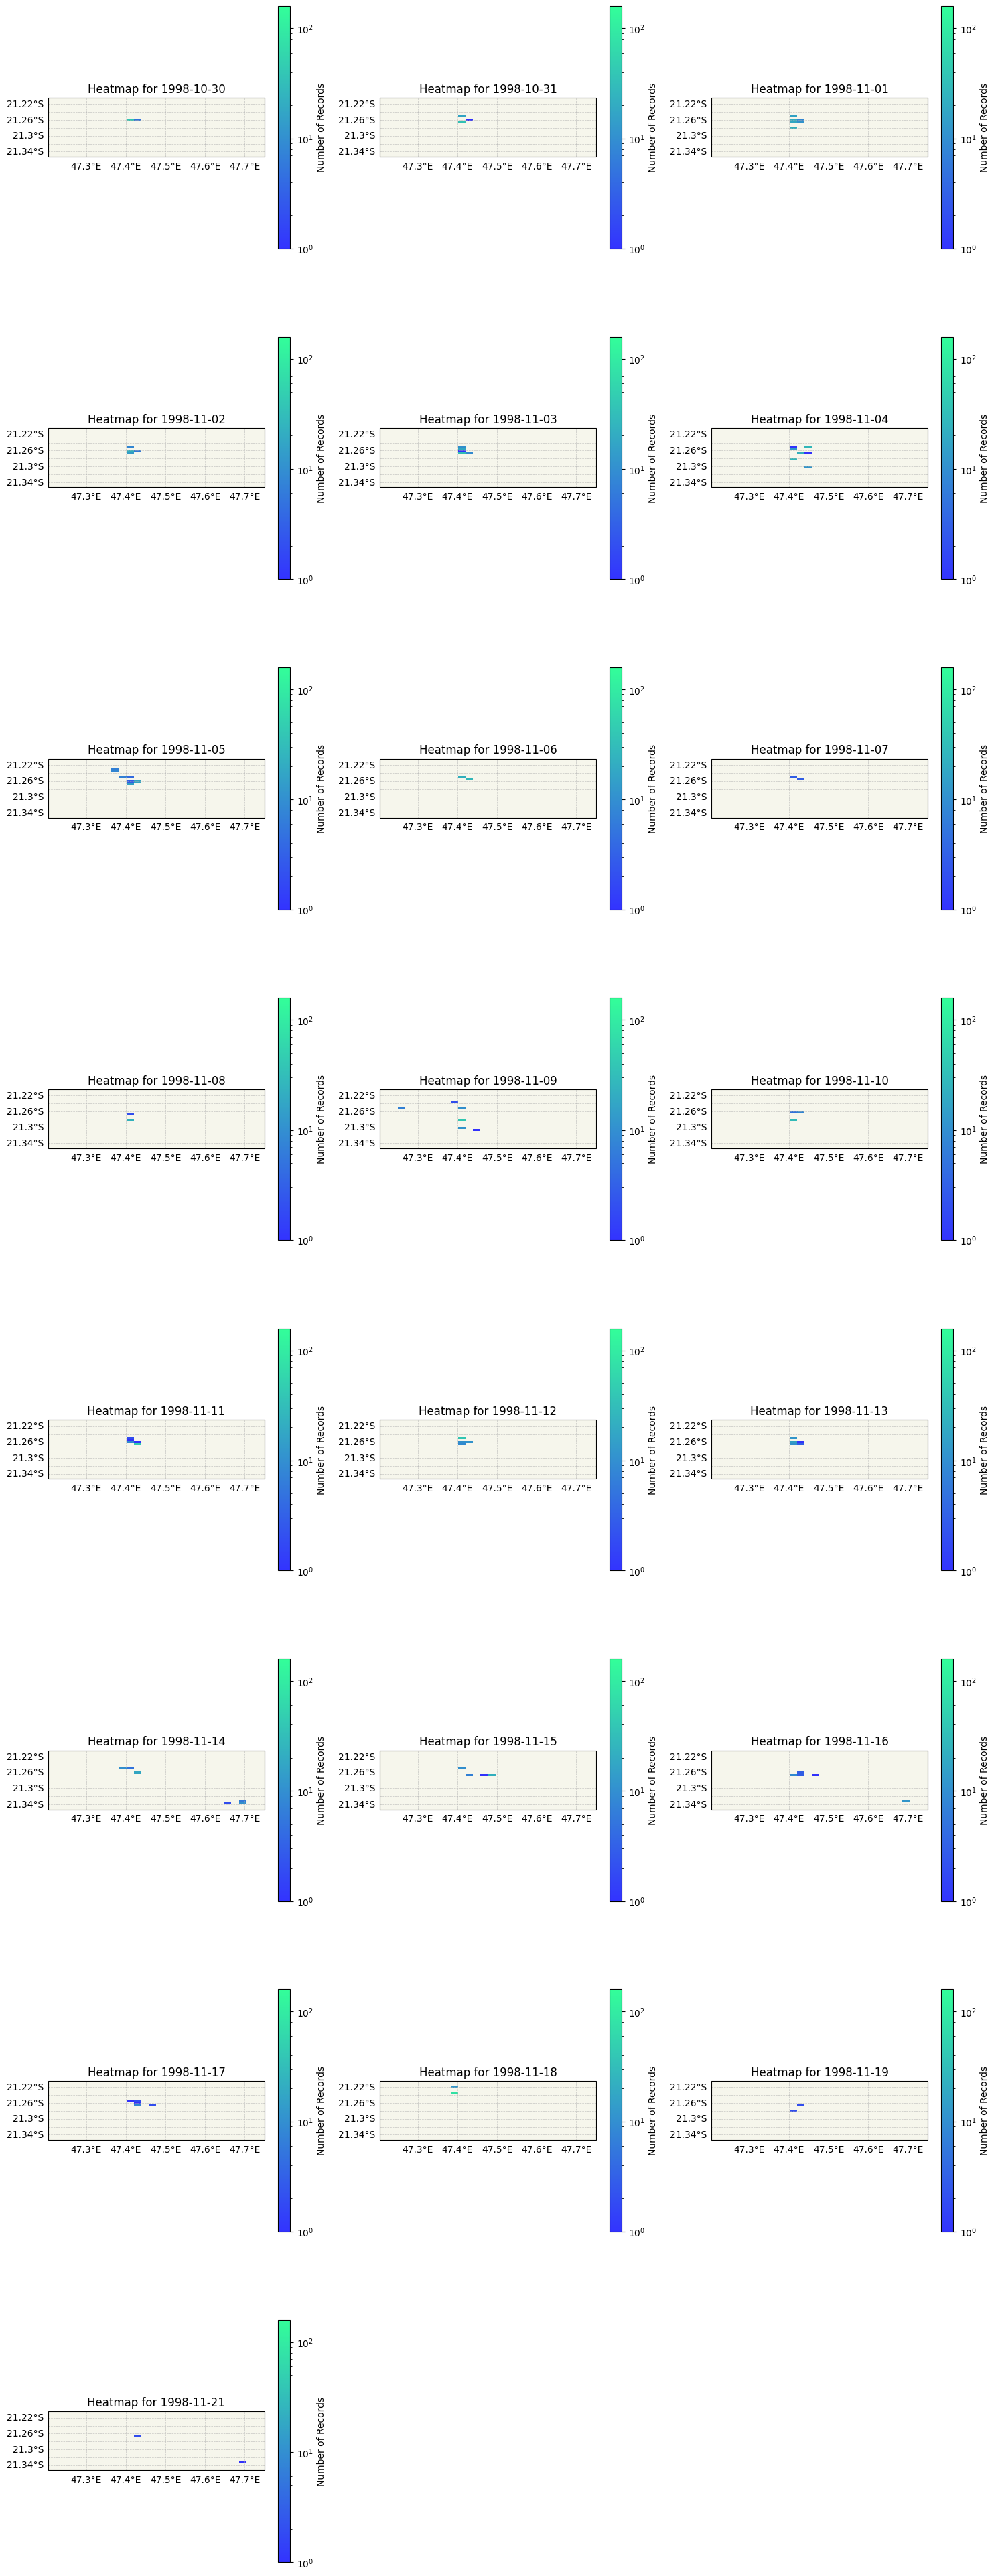

In [172]:
plot_geographical_heatmap_by_day(group0_df, lat_col="latitude1", lon_col="longitude1", datetime_col="startdate",plot_rivers=True, plot_roads=True, grid_size=25)

It all looks like a single cluster to me!

In [173]:
df.loc[group0_df.index, "cluster"] = "10"
df[df.cluster == "10"].__len__()

1072

In [174]:
df.to_csv("../data/labeled_clean_df.csv")

Alright, now we've got all 10 of the clusters we set out to label! Lets find some summary stats on our clusters

# 2. Cluster Summary Stats

In [175]:
df.cluster.value_counts()

cluster
4     3846
3     2622
10    1072
0      265
6       70
5       59
9       21
1        8
8        7
2        1
7        1
Name: count, dtype: int64

In [176]:
len(df.cluster.unique())

12

This looks like a pretty solid distribution of cluster size.

In [177]:

# Function to calculate maximum time difference
def max_time_diff(group):
    return (group["startdate"].max() - group["startdate"].min()).days

# Function to calculate maximum distance
def max_lat(group):
    return (group["latitude1"].max() - group["latitude1"].min())

# Function to calculate maximum distance
def max_lon(group):
    return (group["longitude1"].max() - group["longitude1"].min())


# Function to calculate max differences within consecutive days in a cluster
def max_consecutive_differences(group):
    group = group.sort_values("startdate").reset_index(drop=True)
    group["time_diff"] = group["startdate"].diff().dt.days
    group["lat_diff"] = group["latitude1"].diff().abs()
    group["lon_diff"] = group["longitude1"].diff().abs()

    return pd.Series({
        "max_time_diff_consecutive": np.round(group["time_diff"].max(), 3),
        "max_lat_diff_consecutive": np.round(group["lat_diff"].max(), 3),
        "max_lon_diff_consecutive": np.round(group["lon_diff"].max(), 3),
    })

# Group by 'cluster' and compute summary statistics
summary_stats = df.groupby("cluster").agg(
    startdate_min=("startdate", "min"),
    startdate_max=("startdate", "max"),
    latitude_mean=("latitude1", "mean"),
    latitude_std=("latitude1", "std"),
    longitude_mean=("longitude1", "mean"),
    longitude_std=("longitude1", "std"),
    count=("cluster", "size")
).reset_index()


# Add max time difference and max distance to summary stats
summary_stats["max_time_diff"] = df.groupby("cluster").apply(max_time_diff).values
summary_stats["max_lat_diff"] = np.round(df.groupby("cluster").apply(max_lat).values, 3)
summary_stats["max_lon_diff"] = np.round(df.groupby("cluster").apply(max_lon).values, 3)

# Add max consecutive differences
consecutive_diffs = df.groupby("cluster").apply(max_consecutive_differences).reset_index()
summary_stats = summary_stats.merge(consecutive_diffs, on="cluster")


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_63086/1004204234.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_time_diff'] = df.groupby('cluster').apply(max_time_diff).values
/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_63086/1004204234.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_lat_diff'] = np.round(df.groupby('cluster').apply(

In [178]:
summary_stats

cluster startdate_min startdate_max  latitude_mean  latitude_std  \
0        0    1934-06-11    1934-06-16      41.552656      0.183647   
1        1    1934-08-01    1934-08-01      41.387087      0.041883   
2       10    1998-10-30    1998-11-21     -21.262858      0.019725   
3        2    1934-07-13    1934-07-13      41.232300           NaN   
4        3    2004-10-22    2004-11-14      27.842183      0.147355   
5        4    2006-07-28    2006-09-05      27.825859      0.147052   
6        5    1995-08-03    1995-08-03      53.023728      0.008306   
7        6    2005-05-08    2005-05-20      42.806016      0.059154   
8        7    2005-08-10    2005-08-10      42.886944           NaN   
9        8    1933-11-07    1933-11-07      38.962184      0.000754   
10       9    1934-03-03    1934-03-04      39.117529      0.226031   

    longitude_mean  longitude_std  count  max_time_diff  max_lat_diff  \
0      -120.317713   1.225644e-01    265              5         0.755   
1      -120.257513   4.371732e-02      8              0         0.092   
2        47.425007   5.210064e-02   1072             22         0.124   
3      -120.099100            NaN      1              0         0.000   
4        98.431026   1.225458e-01   2622             23         0.462   
5        98.487494   1.209041e-01   3846             39         0.456   
6      -119.216667   1.844347e-07     59              0         0.017   
7       -71.671270   4.181700e-02     70             12         0.276   
8       -71.710000            NaN      1              0         0.000   
9      -123.686175   4.254149e-04      7              0         0.002   
10     -123.699300   6.704267e-02     21              1         0.469   

    max_lon_diff  max_time_diff_consecutive  max_lat_diff_consecutive  \
0          0.739                        1.0                     0.711   
1          0.109                        0.0                     0.092   
2          0.454                        2.0                     0.091   
3          0.000                        NaN                       NaN   
4          0.408                        1.0                     0.422   
5          0.456                       14.0                     0.389   
6          0.000                        0.0                     0.017   
7          0.169                        7.0                     0.160   
8          0.000                        NaN                       NaN   
9          0.001                        0.0                     0.002   
10         0.145                        1.0                     0.469   

    max_lon_diff_consecutive  
0                      0.472  
1                      0.090  
2                      0.304  
3                        NaN  
4                      0.264  
5                      0.378  
6                      0.000  
7                      0.151  
8                        NaN  
9                      0.001  
10                     0.145

In [179]:
summary_stats.max_time_diff_consecutive.median()

np.float64(1.0)

# 3. Takeaways

We can now use these manually labeled clusters to check the efficacy of clustering algorithms we create! Good to have a little supervision...

## Things to consider

1. Increasing cluster size in more recent expeditions
    - Modern means of travel means people can cover more distance in less time!
    - This is probably overkill, but could be an interesting thing to look at
2. Subclusters
    - It could be interesting to break individual clusters into subclusters for different parties within a larger expedition. We say multiple instances of what looks like 2 parties collecting specimens from distinct zones within a single cluster.
    - What if there are two parties both part of a lager expedition that are far enough apart to be tagged as two separate clusters by our algorithm? Do we care about this? Should we look into it?
3. Density of expeditions
    - How closely packed in (time, distance) can separate clusters be? 
    - What do we feel comfortable setting as thresholds for our clustering algorithm?
4. Text
    - Do we want to use text in our clustering algorithm? And if so, how?
    - We could use it as a backup, in the case of missing spatiotemporal data...
    - We could also use the NLP homogeneity of a field like _text1_, _remarks_, or _localityname_ within a cluster as a metric of cluster confidence

## Thresholds

### Spatial (Lat / Lon)

In this notebook we located clusters by scanning for records within +- 0.5º of both latitude and longitude of a seed record. This in effect scans for records within a 1 square degree lat/lon box.

1º lat corresponds to ~70 km, so 1 square degree lat/lon covers and area of ~1400 km^2. This feels like a conservative area – if anything it may be too big, but I think it's a good starting point.

We could try to be fancy and use other methods for spatial clustering like a spatial aperture with a set radius, or a varying grid size based on global location. That being said, this grid scan method seemed to work pretty well, and is certainly the most simple spatial clustering method. Let's abide by the KISS mentality.

__Lets say 1 degree lat/lon is a reasonable value for our temporal epislon.__


### Temporal (startdate)

In this notebook, we have used __ONLY__ the _startdate_ field as our temporal variable. While there wasn't any specific instruction to do this, it is the only date variable I could find that has halfway-decent coverage, and represents the collection date. I think that's fine.

We identified clusters by first scanning for records within 6 months of the _startdate_ of a seed record, then breaking this into clusters from there. Through this, we found anywhere from 1 cluster to ~10 clusters. This is definitely too large to use as our clustering threshold. 

To determine an ideal temporal threshold, we need to focus on the time between consecutive records within an expedition cluster. The max time between consecutive records in our sample of manually labeled clusters was 10, whereas the median was 1 day. I'm a little skeptical of the 10 day threshold, as it may end up glomming multiple clusters together, especially in a place like California where its easy for CalAcademy scientists to revisit a site within a week.

It seems like a reasonable cutoff would be... 2 weeks? ... 5 days? ... a single day? It depends on how conservative vs aggressive we want to be in our clustering.

__For now, lets say 10 days is a reasonable value for our temporal epislon.__